# Flights
## by Annika Jungmann

## Preliminary Wrangling

> The dataset used is the Airline On Time Data from the Data Expo 2009, which consists of commercial flights within the US from 1987 up until 2008. Originally, the data is from RITA, where it should also be downloadable. Due to memory issues, not a whole year of data could be loaded. To allow for some comparisons, data for January 2018 and January 2019 are selected.

## Data Wrangling

> This first section deals with gathering, assessing and cleaning the data, in order for it to be in analysable shape

### Gathering & Assessing

In [181]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import io
import glob


%matplotlib inline

In [217]:
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Paired.colors)

In [218]:
# Get data file names

path =r'C:\Users\Annika\Documents\Udacity\flights'

filenames = glob.glob(path + "\*.csv")

dfs = []

for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

In [219]:
# Get overview of data
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,...,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY,Unnamed: 22
0,2019,1,6,7,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,0.0,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,7,1,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,8,2,2019-01-08,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,9,3,2019-01-09,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,10,4,2019-01-10,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
# Check that all years are in the table
df.YEAR.unique()

array([2019, 2018], dtype=int64)

### What is the structure of the dataset?

In [221]:
# Check rows and columns
print(df.shape)

(1154103, 23)


> There are 1,154,103 flight records and 23 columns in the dataset

In [222]:
print(df.columns.tolist())

['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIV_ARR_DELAY', 'Unnamed: 22']


### What do these columns entail?

> 1) 'YEAR': year of flight <br>
> 2) 'MONTH': month of flight<br>
3) 'DAY_OF_MONTH': day of month<br>
4) 'DAY_OF_WEEK': day of week<br>
5) 'FL_DATE': flight date (yyyymmdd)<br>
6) 'OP_UNIQUE_CARRIER': Unique airline carrier ID<br>
7) 'ORIGIN_CITY_NAME': Origin airport, city name<br>
8) 'DEST_CITY_NAME': Destination airport, city name<br>
9) 'CRS_DEP_TIME': Departure time (local time: hhmm)<br>
10) 'DEP_DELAY': Difference in minutes between scheduled and actual departure (early departures show negative numbers)<br>
11) 'CRS_ARR_TIME': Arrival time (local time: hhmm)<br>
12) 'ARR_DELAY': Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers<br>
13) 'CANCELLED': Cancelled flight indicator (1 = Yes)<br>
14) 'DIVERTED': Indicates aircraft diversion<br>
15) 'AIR_TIME': Flight time (in minutes)<br>
16) 'FLIGHTS': Number of flights<br>
17) 'DISTANCE': Distance between airports (in miles)<br>
18) 'CARRIER_DELAY': Carrier delay (in minutes)<br>
19) 'WEATHER_DELAY': Weather delay (in minutes)<br>
20) 'NAS_DELAY': National Air System delay (in minutes)<br>
21) 'SECURITY_DELAY': Security delay (in minutes)<br>
22) 'LATE_AIRCRAFT_DELAY': Late previous aircraft delay (in minutes)<br>
23) 'DIV_ARR_DELAY': Delay due to diversion
24) 'Unnamed: 21'


### What is/are the main feature(s) of interest in your dataset?

> Especially the arrival and departure delays are of interest. Moreover, distance is seen as the main dependent variable.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Year, month, carrier name, airport name, arriving flights, weather, late aircrafts, cancelled aircrafts

In [223]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_DELAY,...,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY,Unnamed: 22
0,2019,1,6,7,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,0.0,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,7,1,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,8,2,2019-01-08,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,9,3,2019-01-09,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,10,4,2019-01-10,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154103 entries, 0 to 1154102
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1154103 non-null  int64  
 1   MONTH                1154103 non-null  int64  
 2   DAY_OF_MONTH         1154103 non-null  int64  
 3   DAY_OF_WEEK          1154103 non-null  int64  
 4   FL_DATE              1154103 non-null  object 
 5   OP_UNIQUE_CARRIER    1154103 non-null  object 
 6   ORIGIN_CITY_NAME     1154103 non-null  object 
 7   DEST_CITY_NAME       1154103 non-null  object 
 8   CRS_DEP_TIME         1154103 non-null  int64  
 9   DEP_DELAY            1120425 non-null  float64
 10  CRS_ARR_TIME         1154103 non-null  int64  
 11  ARR_DELAY            1117461 non-null  float64
 12  CANCELLED            1154103 non-null  float64
 13  DIVERTED             1154103 non-null  float64
 14  AIR_TIME             1117663 non-null  float64
 15

> We can see 11 columns that have null values:<br>
1) DIV_ARR_DELAY<br>
2) DEP_DELAY<br>
3) DIVERTED<br> 
4) ARR_DELAY<br>
5) AIR_TIME<br>
6) CARRIER_DELAY<br>
7) WEATHER_DELAY<br>
8) NAS_DELAY<br>
9) SECURITY_DELAY<br>
10) LATE_AIRCRAFT_DELAY<br>
11) Unnamed: 21<br>

In [225]:
df.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY,Unnamed: 22
count,1.154103e+06,1154103.0,1.154103e+06,1.154103e+06,1.154103e+06,1.120425e+06,1.154103e+06,1.117461e+06,1.154103e+06,1.154103e+06,1.117663e+06,1.154103e+06,202982.000000,202982.000000,202982.000000,202982.000000,202982.000000,1844.000000,0.0
mean,2.018506e+03,1.0,1.594746e+01,3.786182e+00,1.326771e+03,9.628845e+00,1.499214e+03,3.554314e+00,2.936913e-02,2.205176e-03,1.121507e+02,7.958646e+02,20.765334,4.585998,16.474633,0.090175,25.286863,282.218547,NaN
std,4.999641e-01,0.0,8.985539e+00,1.954209e+00,4.848706e+02,4.749671e+01,5.077993e+02,4.986758e+01,1.688390e-01,4.690751e-02,7.110707e+01,5.908862e+02,66.097821,37.196128,37.607679,3.305908,50.646237,263.730511,NaN
min,2.018000e+03,1.0,1.000000e+00,1.000000e+00,1.000000e+00,-5.000000e+01,1.000000e+00,-9.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,3.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.018000e+03,1.0,8.000000e+00,2.000000e+00,9.160000e+02,-6.000000e+00,1.112000e+03,-1.600000e+01,0.000000e+00,0.000000e+00,6.000000e+01,3.610000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,NaN
50%,2.019000e+03,1.0,1.600000e+01,4.000000e+00,1.320000e+03,-3.000000e+00,1.524000e+03,-7.000000e+00,0.000000e+00,0.000000e+00,9.400000e+01,6.340000e+02,0.000000,0.000000,4.000000,0.000000,0.000000,183.000000,NaN
75%,2.019000e+03,1.0,2.400000e+01,5.000000e+00,1.730000e+03,6.000000e+00,1.920000e+03,7.000000e+00,0.000000e+00,0.000000e+00,1.420000e+02,1.034000e+03,17.000000,0.000000,20.000000,0.000000,30.000000,297.000000,NaN
max,2.019000e+03,1.0,3.100000e+01,7.000000e+00,2.359000e+03,2.007000e+03,2.400000e+03,2.023000e+03,1.000000e+00,1.000000e+00,6.910000e+02,4.983000e+03,2007.000000,1682.000000,1447.000000,816.000000,1648.000000,2524.000000,NaN


In [226]:
df.MONTH.unique()

array([1], dtype=int64)

> Indeed, month always has the value 1

In [227]:
df.duplicated().sum()

3

> There are 3 duplicates in the data set

### Quality issues
1) Year, month, day of the week  and flight date are not of type datetime <br>
3) Departure time and arrival time are also not of type datetime <br>
4) The "unnamed 21" column can be dropped <br>
5) Duplicates should be dropped <br>
6) There is no simple column which indicates whether the plane was delayed or not or even earlier.


### Tidiness issues
> 1) Column names should all be lowercase <br>


### Cleaning

In [228]:
flights = df.copy()

In [229]:
# Lowercase column names for simplicity
flights.columns = map(str.lower, flights.columns)
flights.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_delay,...,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_arr_delay,unnamed: 22
0,2019,1,6,7,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,0.0,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,7,1,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,8,2,2019-01-08,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,9,3,2019-01-09,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,10,4,2019-01-10,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
# Drop unneeded columns
flights.drop(['unnamed: 22'], axis = 1, inplace = True)
print(flights.shape)

(1154103, 22)


> We now only have 22 columns left

In [231]:
# Create new delayed columns (as per definition, a delay is considered as 15 minutes or later)
flights['delayed'] = flights['arr_delay'] >= 15
flights.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_delay,...,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_arr_delay,delayed
0,2019,1,6,7,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,0.0,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2019,1,7,1,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2019,1,8,2,2019-01-08,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2019,1,9,3,2019-01-09,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2019,1,10,4,2019-01-10,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,0.0,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False


In [232]:
# Create new delayed columns (as per definition, a delay is considered as 15 minutes or later)
flights['early'] = flights['arr_delay'] < 0
flights.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_delay,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_arr_delay,delayed,early
0,2019,1,6,7,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,2019,1,7,1,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,2019,1,8,2,2019-01-08,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,2019,1,9,3,2019-01-09,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,2019,1,10,4,2019-01-10,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True


> Thus, we now have 24 columns.

In [233]:
# Convert date types
flights.fl_date = pd.to_datetime(flights.fl_date)
flights.crs_dep_time = flights.crs_dep_time.astype(str)
print(flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154103 entries, 0 to 1154102
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   year                 1154103 non-null  int64         
 1   month                1154103 non-null  int64         
 2   day_of_month         1154103 non-null  int64         
 3   day_of_week          1154103 non-null  int64         
 4   fl_date              1154103 non-null  datetime64[ns]
 5   op_unique_carrier    1154103 non-null  object        
 6   origin_city_name     1154103 non-null  object        
 7   dest_city_name       1154103 non-null  object        
 8   crs_dep_time         1154103 non-null  object        
 9   dep_delay            1120425 non-null  float64       
 10  crs_arr_time         1154103 non-null  int64         
 11  arr_delay            1117461 non-null  float64       
 12  cancelled            1154103 non-null  float64       
 1

In [234]:
flights['year'] = pd.DatetimeIndex(flights['fl_date']).year
flights.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_delay,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_arr_delay,delayed,early
0,2019,1,6,7,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,2019,1,7,1,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,2019,1,8,2,2019-01-08,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,2019,1,9,3,2019-01-09,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,2019,1,10,4,2019-01-10,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True


In [235]:
flights['day_of_week'] = pd.DatetimeIndex(flights['fl_date']).dayofweek
flights.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_delay,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_arr_delay,delayed,early
0,2019,1,6,6,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,2019,1,7,0,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,2019,1,8,1,2019-01-08,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,2019,1,9,2,2019-01-09,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,2019,1,10,3,2019-01-10,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True


In [236]:
flights.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_delay,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_arr_delay,delayed,early
0,2019,1,6,6,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,2019,1,7,0,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,2019,1,8,1,2019-01-08,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,2019,1,9,2,2019-01-09,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,2019,1,10,3,2019-01-10,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True


In [237]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154103 entries, 0 to 1154102
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   year                 1154103 non-null  int64         
 1   month                1154103 non-null  int64         
 2   day_of_month         1154103 non-null  int64         
 3   day_of_week          1154103 non-null  int64         
 4   fl_date              1154103 non-null  datetime64[ns]
 5   op_unique_carrier    1154103 non-null  object        
 6   origin_city_name     1154103 non-null  object        
 7   dest_city_name       1154103 non-null  object        
 8   crs_dep_time         1154103 non-null  object        
 9   dep_delay            1120425 non-null  float64       
 10  crs_arr_time         1154103 non-null  int64         
 11  arr_delay            1117461 non-null  float64       
 12  cancelled            1154103 non-null  float64       
 1

## Univariate Exploration

## Year

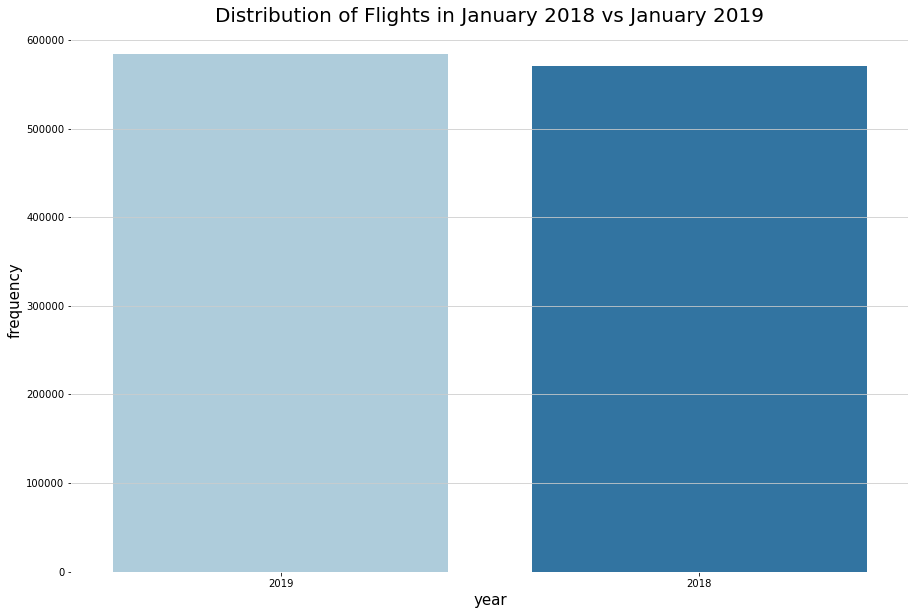

In [238]:
cat_order = flights.year.value_counts().index
plt.figure(figsize = (15, 10))
sb.countplot(data = flights, x = 'year', order = cat_order)
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('Distribution of Flights in January 2018 vs January 2019')

plt.show()

> There were more or less the same amount of flights in both years.

## Day of the Week

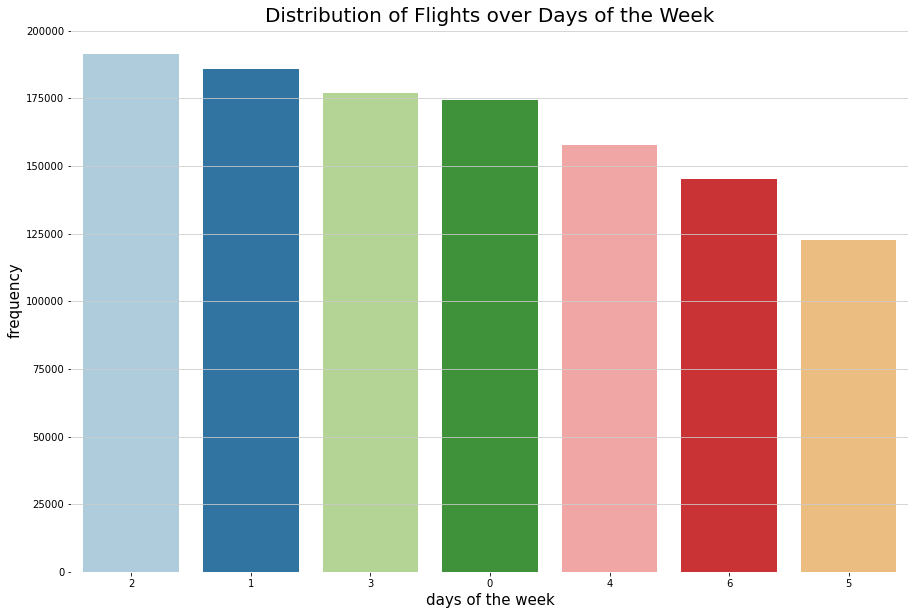

In [239]:
cat_order = flights.day_of_week.value_counts().index
plt.figure(figsize = (15, 10))
sb.countplot(data = flights, x = 'day_of_week', order = cat_order)
plt.xlabel('days of the week')
plt.ylabel('frequency')
plt.title('Distribution of Flights over Days of the Week')

plt.show()

> Most flights seem to be taken on Tuesday and Wednesday. This is likely highly driven through business travel. It is still rather surprising, however, that Friday through Sunday have the lowest flight amount.

## Operating Carrier

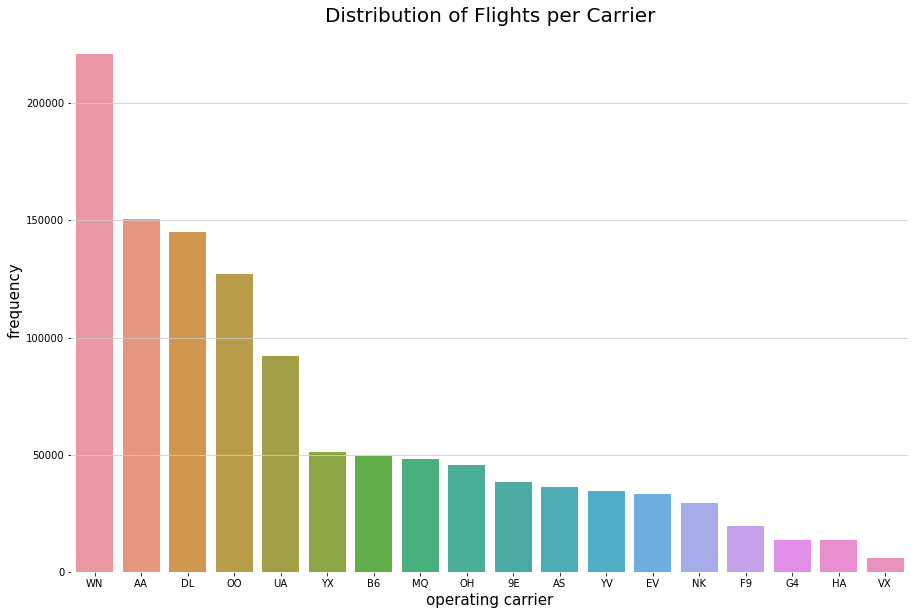

In [240]:
cat_order = flights.op_unique_carrier.value_counts().index
plt.figure(figsize = (15, 10))
sb.countplot(data = flights, x = 'op_unique_carrier', order = cat_order)
plt.xlabel('operating carrier')
plt.ylabel('frequency')
plt.title('Distribution of Flights per Carrier')

plt.show()

> There is a large dispersion when it comes to operating carriers. Carrier WN has the largest share of flights by far, with four carriers following closely.

In [241]:
cancelled_flights = flights[flights.cancelled == 1]
cancelling_ops = cancelled_flights.op_unique_carrier.value_counts()

Text(0.5, 1.0, 'Cancellations of Flights per Carrier')

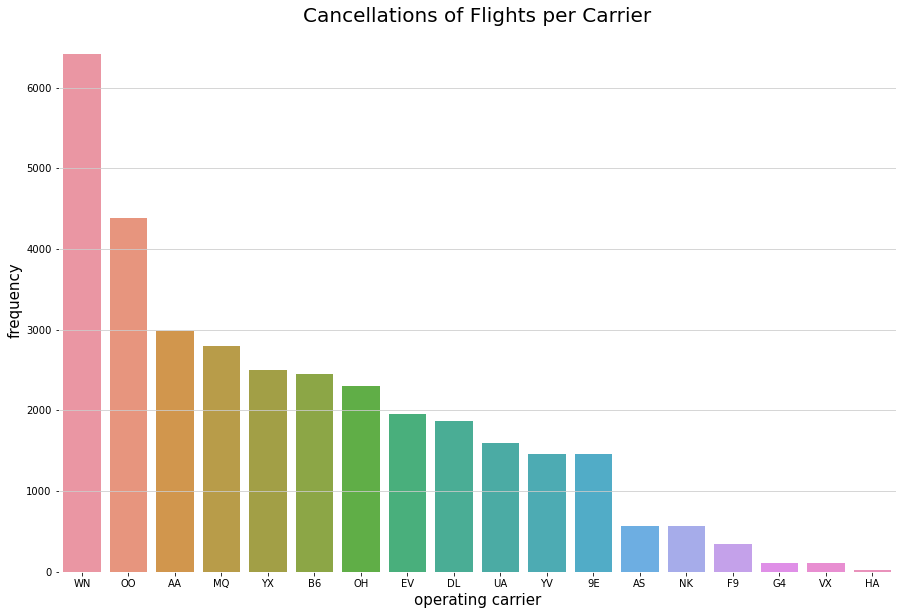

In [242]:
plt.figure(figsize = (15, 10))
g = sb.countplot(data = cancelled_flights, x = 'op_unique_carrier', order = cancelling_ops.index)
plt.xlabel('operating carrier')
plt.ylabel('frequency')
plt.title('Cancellations of Flights per Carrier')

> Looking at carriers who mostly cancel their flights, one can again see WM at the top of the list. Interestingly, DL appeared as the top 3 operating airline, while they don't appear to be cancelling many flights.

## Air Time

c:\users\annika\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\annika\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


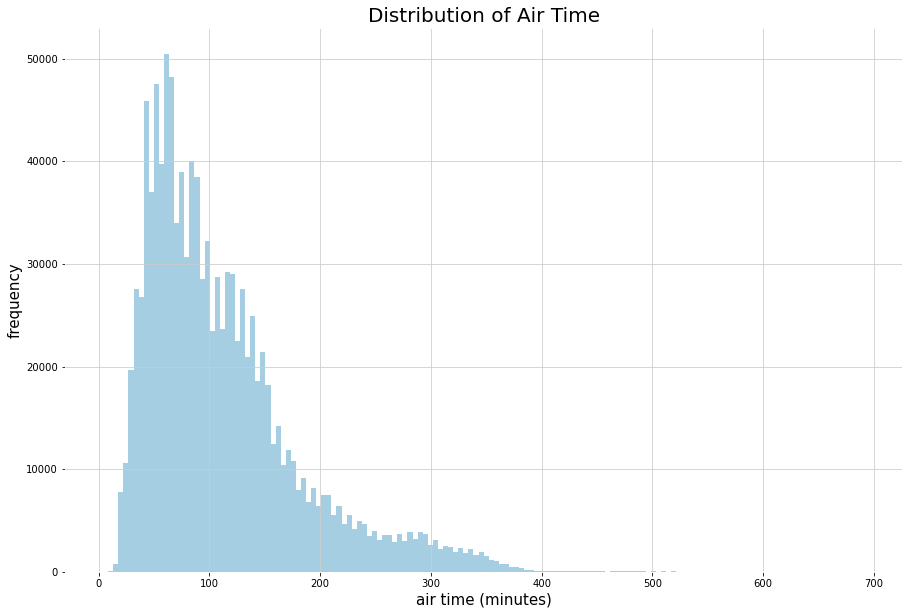

In [243]:
bins = 150
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA40AAAJnCAYAAAAz/LZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+j8jraAAAgAElEQVR4nOzde7ikV10n+u+PNLmAcgnXJJ2YeMgwDZwDDYhxAjzBKES8hDMHxrSOBIlGGY4Do6MCHrmomYHHM4MwR3AigQTUhghykQOEGECdEQmXxoPJFmhMSDoJiSTQBJlOTHqdP+rdQ2V3re69u/feVbX783meeqpqvZf61V67n+5vr/Wut1prAQAAgEnuNe0CAAAAmF1CIwAAAF1CIwAAAF1CIwAAAF1CIwAAAF1CIwAAAF1CI8BhrKo+VlVTu/dSVV1cVa2qTh5rO3lou3hadQ11TPVns1qq6tSqendVfWX4uX59jT7nlcP5z1iL88/65wNsZEIjwJwb/qE8/rijqv6hqj5TVW+qqh+qqiPW6LOvrapr1+Lca21SYN1ohn5/T5JnJnl/klclefUKz/FrY79bj1yDMpd+3skTfqcP9DhjresCOJxVa3P/n6gAh7Wx0bBXDc9HJHlAkkcnOT3JkUk+leQnW2tfWHLsSUnu01r7u4P87GuTpLV28kEef1yS+yf5Umvtn4a2k5Nck+SS1trzDua8y/zsi5Ocm+SU1tq1E7Yf0s9mFlTVI5J8Mcnvt9bOP4jjK8mXkpycpJL8p9bav+/s++AkD05yXWvtW4dQ8wOSvHjCplcMz6+asO3iJN9cjc8HYF+bpl0AAKujtfbKpW1V9bAk/yXJc5L8WVU9sbV2y9gx161fhftqrd2U5KZp1tAz7Z/NKjl+eL7xII9/epJTMgplP5Tk3Kp6WWvtzqU7tta+muSrB/k54+f5epJXLm2vqlcM2/fZNuaQPx+AfZmeCrCBtdZuTnJOko8lOTHJy8a3T7pur0bOraq/Gqa57qmq66vqsqr68WGfM4bjvivJdy2ZKnjx2Lna8BkPH6bK3lBVd1fV84bt+50iWlX/vKreU1W3VdU/VtV/q6qnT9ivez3bpGskh9rPHd5eM1b7tfv72Qzt96qqn6+qT1bVN4e6PllVL6iqff5eHfsZPLiqLqyqm4YpxFdV1U9P+t77U1VPqKp3VdUtw3m+XFVvGEZt7/G5Sf58ePuKse/4yhV83M8Oz7+f5A8zGsn73zt1TeyDA/0OrJZlfP7DqurNVXXz0Gd/VVVPGfa5b1X99vCzXOyb5+zns7ZV1Uer6mvDn4+Fqvq/quqo1fxOALPCSCPABtda21tVv5XkjCTbqurftf1fm3BBkpdmNEX00iS7kxyX5HsyGrF8R5JrM5omuDiN8HfGjv/skvMdm+SvM5o++CdJ9ia5eRmln5Lk40n+Nsl/HWr48SQfrKqfaK29Yxnn6HlVkmcleWyS1yVZXBxmOYvEvC3JTyS5PsmbkrSMgtQbkjw5yU9OOOYBSf57kjuTvDPJ0UmeneTNVbW3tXbJcoquqh9J8q6Mpoq+M8mXkzwhyQuSnF1Vp49NtX1VRtNKz80oPH5saP9YlmEYpf6xJF9orf1VVX0jyS8mOT+j34GVONjfgdWy+PO/Pcn2oZ5zklxWVd+X0e/XsRld93nvJNuSvKOqrm+t/fX4iarqoiTPT7Iro+/y9SSnJfnNJGdW1Q+21u5al28FsF5aax4eHh4ec/zIKLS0A+xzVJJ/GvY9Zaz9Y0uPTXJrRv8gvs+E8zx4yftrk1x7oNqSvDXJpgnbLx62nzzWdvLYcb+9ZP8nDt/ja0nuN9b+ymH/MyZ8xuL5Lj7QZy/ZPulns2045jNJvmOs/b4ZXTfakvxE52fwpiRHjLU/KsldSa5eZj9/R0bTL+9O8pQl2351+IwPL2k/Y2h/5UH8Xr1kOPalY22fzijwPWLC/hP74EC/A6v1e76Mz/+9JPcaa/+pof22JH+a5OixbU8Ztr17ybmeN7T/SZJjOp//ooP9jh4eHh6z+jA9FeAw0Fq7I6MwmCQPWcYh/5RROFl6noO5ZuzOJP++rXz0ZXeS31jy+Z/KaJrkA9KZJrnGnj88v6S19s2xuv4xo+CWJD8z4bhvJfnF1trdY8dcndHo15aq+s5lfPbZSR6U5B2ttb9csu0/ZRTgf7BGC/gckqqqjL7H3ozC3qKLMxrlnPQd9+dgfwdWy7eS/HJrbe9Y2x9lFNofmFHQ27O4Yfj5XpvkcUvO86LhmOe31v7Hkm2/mdGfsUkjzQBzzfRUgMNHDc8HWjb7D5P8QpKrquqPM5ra+PHW2u6D/Nxr29jiOyvwmdba7RPaP5bRlMutSZY1rXMVPT6jIPWxCdv+PKOgvXXCti+21r4xof364fkBGU2dPNBnJ8lHlm5ord1VVX+R0ajq1iSHuojP9yf5X5Jc1lq7Yaz9j5L830meV1W/3oYVb5fhYH8HVssXlv4utdburqqbk9y3tfb3E465Icn3Lr6pqvtkNJ35q0lePMrV+7gjyZZVqxpgRgiNAIeBqjo6o2u2kuQfDrD7v8voNgvPz2iK4kuS3FVVH0jyS621nSv8+K+scP9FvWveFs93/4M876G4f5Lb2uTVQ++qqq8meeiE43rXSi6OvC3nPpqL37e32uxi+wOWca4DWbw9x8Xjja21W6vqT5P8HxmNfL5zmec72N+B1dL7D4+7DrBt/N9JD8zoP14ekm/f/gPgsGB6KsDh4ckZ/QP45jbhnoTjWmt3t9Ze11p7bJKHZRQQ3p3RoigfOogVIg/2hsAP67Q/fHge/8f+4rTDSf8ZuhohatHuJMdW1b2XbqiqTRmtLjppRHG1Pjv59vdf6rgl+x2UqnpIRosEJcn2JSvjtox+H5JvB8vl2Ag3hV78ue5ordX+HlOtEmANGGkE2OCG20D82vD2j1Zy7DCl8E+S/ElVXZHRtMXHZLQgSjKajnnkKpW61OOr6jsnTFE9Y3jeMdb2teH5xAnneWLn/IvXFy5nlG/RjiRnJnlqkiuWbHvqcK7PrOB8K7H4fc9IctH4hiGwPnl4e6iff25Gffrp7LsS7qIfS/IDVXVKa+2aQ/y8udBa+2ZVXZXk0VV1bGvttmnXBLBejDQCbGBV9dAkb88oaFyX5D8cYP+jqurMWnLB1jCytji99Vtjm25N8pCqOmbViv62+yd5+ZI6npjRQiO7Mxr9XHTl8PzTQ4Ba3P/EpecYs7gw0EoWjnnz8Pwfh2vcFj/nPklePby9aJ+jVsd7Mlrpc1tVnbZk24uTfHeSP2utHer1jIuL3Pyb1trPTHpkdIuKg1kQZ97954wC9Zurap8R7Kp6YFU9ft/DAOabkUaADWLspu33ymhK5qMzGn06MqNQ9ZPLWP30mCR/luTaqvpERvcBPDrJD2a0wMf7WmsLY/tfkdH9Gz80LMRyR5K/aa396Sp8pb9I8jNV9b0ZrTK6eJ/GeyX5ufGFZVprnxg+/6lJrqyqj2Q0vfVHk1yWySOQVyT55SS/X1XvzOgegl9vrf0/vYJaa39UVWcn+VcZLRT0noymXj4ro/tKXtpa+8ND/N69z/5mVT0/yR8n+fNhkaLrMrpP49Mzum7w5w7lM6rqjCSPTPK51tqV+9n1ooxGr3+6ql4xxVVR11Vr7c1V9YQk/ybJl6rqsoz64NiM+v+pSd6S5OenVyXA6hMaATaOxcU57sxoJc4vZ3S7hHdldP++vb0DxyzeOuJpSf5FRmHo9owWxnlBvj3Stui3MgqoP5rk9IymZ16S0X3vDtU1Gf3j+9XD81EZTb38jdbaZRP2PzvJbw/Pv5Dki0l+JcmHMwp599Bau6yqfinJz2a0+M+RGf3MuqFxsC2jlVKfn2+HtIWMbnvxxuV/vZVrrb23qk5P8rIkz8hoNPYrGd2D8Ddbazce4kf87PD8pgPUcW1V/VlG/5nwo7nnqO+G1lp7YVV9MKPfyR/I6Pf/tozC428n+YMplgewJqq1jXBtOgAAAGvBNY0AAAB0CY0AAAB0CY0AAAB0CY0AAAB0CY0AAAB0ueXGyEwsIbtnz54cffTR0y6DFdJv80vfzS99N7/03XzSb/NL382vKfTdV5M8ZNIGI40z5Jprrpl2CRwE/Ta/9N380nfzS9/NJ/02v/Td/JpC3325t0FoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoGvTtAuAcdt37NqnbdvWzVOoBAAASKYw0lhV11bV56rqs1X1qaHt2Kq6vKq+ODw/cGz/l1bVzqr6fFU9Y6z9CcN5dlbV66uqhvajquodQ/snqurk9f6OAAAAG8W0pqc+rbX2uNbaE4f3L0lyRWvt1CRXDO9TVY9Kck6SRyc5K8kbquqI4Zg3Jjk/yanD46yh/bwkX2utPSLJa5O8Zh2+DwAAwIY0K9c0np3kkuH1JUmeNdb+9tbaHa21a5LsTPKkqjouyf1aax9vrbUkb11yzOK53pnkzMVRSAAAAFZmGqGxJflwVX26qs4f2h7WWrspSYbnhw7tJyS5fuzYXUPbCcPrpe33OKa1dleS3UketAbfAwAAYMObxkI4p7fWbqyqhya5vKr+bj/7ThohbPtp398x9zzxKLCenyQ33HBDdu/evf+q18GePXuysLAw7TKm6qS9d+7TtrBw+xQqWT79Nr/03fzSd/NL380n/Ta/9N38Wu++27JlS3fbuofG1tqNw/MtVfXuJE9KcnNVHddau2mYenrLsPuuJCeOHb45yY1D++YJ7ePH7KqqTUnun+S2CXVcmOTCxbfHH3/8any9Q7KwsLDfzjocTFo99fQts716qn6bX/pufum7+aXv5pN+m1/6bn7NUt+t6/TUqrpvVX3n4uskT0/yt0nel+TcYbdzk7x3eP2+JOcMK6KektGCN1cOU1hvr6rThusVn7vkmMVzPTvJR4brHgEAAFih9R5pfFiSdw/r0mxK8kettQ9V1SeTXFpV5yW5LslzkqS1dlVVXZrk6iR3JXlha+3u4VwvSHJxkmOSfHB4JMlFSd5WVTszGmE8Zz2+GAAAwEa0rqGxtfb3SR47of3WJGd2jrkgyQUT2j+V5DET2vdkCJ0AAAAcmlm55QYAAAAzSGgEAACgS2gEAACgS2gEAACgS2gEAACgS2gEAACgS2gEAACgS2gEAACgS2gEAACgS2gEAACgS2gEAACgS2gEAACgS2gEAACga9O0C4AD2b5j1z5t27ZunkIlAABw+DHSCAAAQJfQCAAAQJfQCAAAQJfQCAAAQJfQCAAAQJfQCAAAQJdbbrAu3DYDAADmk5FGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAuoRGAAAAujZNuwDm2/Ydu/Zp27Z18xQqAQAA1oKRRgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqERgAAALqmEhqr6oiq2lFV7x/eH1tVl1fVF4fnB47t+9Kq2llVn6+qZ4y1P6GqPjdse31V1dB+VFW9Y2j/RFWdvN7fDwAAYKOY1kjji5IsjL1/SZIrWmunJrlieJ+qelSSc5I8OslZSd5QVUcMx7wxyflJTh0eZw3t5yX5WmvtEUlem+Q1a/tVAAAANq51D41VtTnJDyd501jz2UkuGV5fkuRZY+1vb63d0Vq7JsnOJE+qquOS3K+19vHWWkvy1iXHLJ7rnUnOXByFBAAAYGWmMdL4O0l+JcnesbaHtdZuSpLh+aFD+wlJrh/bb9fQdsLwemn7PY5prd2VZHeSB63uVwAAADg8bFrPD6uqH0lyS2vt01V1xnIOmdDW9tO+v2OW1nJ+RtNbc8MNN2T37t3LKGdt7dmzJwsLCwfecYactPfOfdoWFm5f1f0mmXTsct32rX0/49j7HHnQ55vHfmNE380vfTe/9N180m/zS9/Nr/Xuuy1btnS3rWtoTHJ6kh+rqmcmOTrJ/arqD5LcXFXHtdZuGqae3jLsvyvJiWPHb05y49C+eUL7+DG7qmpTkvsnuW1pIa21C5NcuPj2+OOPX43vd0gWFhb221mzaPuOXfu0nb5l86ruN8mkY5drubUs1zz2GyP6bn7pu/ml7+aTfptf+m5+zVLfrev01NbaS1trm1trJ2e0wM1HWmv/Osn7kpw77HZukvcOr9+X5JxhRdRTMlrw5sphCuvtVXXacL3ic5ccs3iuZw+fsc9IIwAAAAe23iONPa9OcmlVnZfkuiTPSZLW2lVVdWmSq5PcleSFrbW7h2NekOTiJMck+eDwSJKLkrytqnZmNMJ4znp9CVZmuaOKAADA9EwtNLbWPpbkY8PrW5Oc2dnvgiQXTGj/VJLHTGjfkyF0AgAAcGimdZ9GAAAA5oDQCAAAQJfQCAAAQJfQCAAAQJfQCAAAQJfQCAAAQNes3KcRDtmk+z5u27p5CpUAAMDGYaQRAACALqERAACALqERAACALqERAACALgvhQCYvopNYSAcAAIw0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0LVp2gWw8WzfsWvaJQAAAKvESCMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdQiMAAABdm6ZdAByM7Tt2TbsEAAA4LBhpBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoGvTtAuAebN9x657vD9p751TqgQAANaekUYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6hEYAAAC6Nk27AFhL23fsmnYJAAAw14w0AgAA0CU0AgAA0LWuobGqjq6qK6vqb6rqqqp61dB+bFVdXlVfHJ4fOHbMS6tqZ1V9vqqeMdb+hKr63LDt9VVVQ/tRVfWOof0TVXXyen5HAACAjWS9RxrvSPL9rbXHJnlckrOq6rQkL0lyRWvt1CRXDO9TVY9Kck6SRyc5K8kbquqI4VxvTHJ+klOHx1lD+3lJvtZae0SS1yZ5zXp8MQAAgI1oXUNjG/nm8Pbew6MlOTvJJUP7JUmeNbw+O8nbW2t3tNauSbIzyZOq6rgk92utfby11pK8dckxi+d6Z5IzF0chAQAAWJl1v6axqo6oqs8muSXJ5a21TyR5WGvtpiQZnh867H5CkuvHDt81tJ0wvF7afo9jWmt3Jdmd5EFr820AAAA2tmXfcqOqjm2t3XaoH9hauzvJ46rqAUneXVWP2d/HTjrFftr3d8w9T1x1fkbTW3PDDTdk9+7d+617PezZsycLCwvTLmNFTtp757RLWFMLC7fv07b0Ox+Zu+au3xiZxz9zjOi7+aXv5pN+m1/6bn6td99t2bKlu20l92m8qarem+QtSS5rre09lKJaa1+vqo9ldC3izVV1XGvtpmHq6S3DbruSnDh22OYkNw7tmye0jx+zq6o2Jbl/kn3CbmvtwiQXLr49/vjjD+XrrIqFhYX9dtYs2uj3QTx9y+Z92pZ+55P23jp3/cbIPP6ZY0TfzS99N5/02/zSd/NrlvpuJdNTfz6jaaPvT3J9Vf2HqnrkSj6sqh4yjDCmqo5J8gNJ/i7J+5KcO+x2bpL3Dq/fl+ScYUXUUzJa8ObKYQrr7VV12nC94nOXHLN4rmcn+chw3SMAAAArtOyRxtbaW5K8paq+O8nzkvxUkl+tqr9O8uYk7xhb5KbnuCSXDCug3ivJpa2191fVx5NcWlXnJbkuyXOGz7yqqi5NcnWSu5K8cJjemiQvSHJxkmOSfHB4JMlFSd5WVTszGmE8Z7nfEQAAgHtayfTUJElr7e+TvDzJy6vq+5O8MqNpnq+rqncmeX1r7TOdY/+/JFsntN+a5MzOMRckuWBC+6eS7HM9ZGttT4bQCQAAwKE5qNVTq+o+VfW8jMLjkzMaCXxtki1JPllVv7xqFQIAADA1KwqNVfXUqnpLkq8keV2Szyc5rbX2v7bWfr219r1JXprkJatfKgAAAOtt2aGxqr6U5KNJHpHk3yY5rrX2c621K5fsekWSB65eiQAAAEzLSq5pfFeSN7XWvrC/nVprn85BTnuFw9Gk25Zs27rvrT4AAGAaVrJ66q+sZSEAAADMnmWHxqq6IMmDW2s/N2Hb7yX5h9bar69mcXC4MvoIAMCsWMk00m1J/rKz7S+T/MShlwMAAMAsWUloPD7JDZ1tNw7bAQAA2EBWshDOV5I8PqMVVJd6fJJ/WJWKYIMwxRQAgI1gJSONlyZ5eVX98HhjVT0zya8neftqFgYAAMD0rWSk8eVJHpfkT6vq1iQ3JTkuybFJPpxRcIQNZdJoIQAAHE5WcsuNPUmeXlXPSPK0JA9KcmuSK1prl69RfQAAAEzRSkYakySttcuSXLYGtQAAADBjVhwaq+qoJCckOXrpttba1atRFAAAALNh2aGxqo5PcmGSH5q0OUlLcsQq1QUAAMAMWMlI45syurXGLya5Osmda1IRAAAAM2MlofH0JD/bWrt0rYoBAABgtqzkPo23JPkfa1UIAAAAs2clofHlSX61qu63VsUAAAAwW1YyPfVfJjkpyZer6pNJvr5ke2ut/fiqVQYAAMDUrSQ0PjjJl4bX907ykNUvh1mxfceufdq2bd08hUrYH/0EAMBaW3ZobK09bS0LAQAAYPas5JrG/6lGjq+qlYxUAgAAMGdWFBqr6plV9Ykke5Jcn+R/G9p/v6r+9RrUBwAAwBQtOzRW1XOTvC/J3yU5P0mNbf5CkvNWtzQAAACmbSUjjb+W5Ldba+cm+YMl265K8qhVqwoAAICZsJLQ+F1JLu9s25PE/RsBAAA2mJWExuuTbO1se2KSnYdeDgAAALNkJaufXpTkFVV1c5L3DG1VVWcm+ZUkv7HaxTFbJt0TEAAA2NhWEhpfk+TEJJckuXto+6skRyT5r621169ybQAAAEzZskNja60leWFVvTbJmUkelOS2JB9prX1hjeoDAABgilYy0pgkaa3tjOsXAQAADgvLDo1V9cwD7dNa+8ChlQMAAMAsWclI4/uTtCS1pL2NvT7ikCsCAABgZqwkNJ4yoe3YJE9P8rwkP70aBQEAADA7VrIQzpcnNH85yY6qujvJy5L82GoVBgAAwPTda5XOsyPJ96/SuQAAAJgRhxwaq+rIjKan3nTI1QAAADBTVrJ66idzz0VvkuTIJCcn+c64phEAAGDDWclCOFdl39C4J8kfJ3lPa+2qVasKAACAmbCShXCet4Z1AAAAMINWayEcAAAANqCVXNP40ew7PbWrtWY1VQAAgDm3kpHGryb5Z0mekuQ+Sb45PD85yalJbl3yAAAAYM6tZCGcDyV5ZJJ/0Vq7brGxqk5K8v4kH26t/f4q1wcAAMAUrWSk8deSvHw8MCbJ8P4VSV62moUBAAAwfSsJjQ9PclRn21FJHnro5QAAADBLVjI99WNJXlNVX2qtfWqxsaq+J8lrkvz5KtcGrJLtO3bt07Zt6+YpVAIAwLxZyUjj+UluS/KJqrqxqj5bVTcm+euh/fy1KBAAAIDpWfZIY2ttV5LHV9Uzk3xPRtNVv5Lkk621D6xRfQAAAEzRSqanJkmGgCgkAgAAHAZWMj01VXVUVb2gqi6qqsuq6tSh/cerasvalAgAAMC0LHuksar+WZLLk9w/yaeTnJHkO4fNT0nyw0meu8r1AQAAMEUrGWl8fZLrkpyc5BlJamzbnyd58uqVBQAAwCxYyTWNT0nynNba16vqiCXbbk5y3OqVBQAAwCxYyUjjniTHdLadkOTrh14OAAAAs2QlofHyJC+rqvuPtbWqOirJL8SKqgAAABvOSqan/nKS/55kZ0YBsiV5eZJHJzkyyb9c9eoAAACYqmWPNLbWrk/y2CS/l9FiOF/K6DrGP07yhNbaV9aiQAAAAKZnWSONVXV0kv+S5KLW2q8n+fU1rQoAAICZsKzQ2FrbU1XnJPnDNa4HNrTtO3ZNuwQAAFiRlSyE85EkT1urQgAAAJg9K1kI53eTvKmq7pvRSqk3Z7QYzv/UWrt6FWuDuWEEEQCAjWolofFDw/MvDo/xwFjD+yNWqS4AAABmwH5DY1W9OclvttauyWhq6v2SfGM9CgMAAGD6DjTSeG5Gt9i4JqNrGr+vtfcdtyMAABjbSURBVHblmlcFAADATDhQaLwpyRlVdXVGU1CPrqr79HZurX1rNYsDAABgug60euqFSV6dZHdG1yx+NMnt+3kAAACwgex3pLG19htV9f8m2ZLkrUl+K8mX1qMwAAAApu+Aq6e21j6d5NNVdWaStwyL4gAAAHAYWPYtN1prP72WhQAAADB7DnRNIwAAAIexZY80AtO1fceuaZcAAMBhyEgjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXZumXQAwO7bv2LVP27atm6dQCQAAs8JIIwAAAF1CIwAAAF1CIwAAAF1CIwAAAF0WwoENZtJiNgAAcLCMNAIAANAlNAIAANAlNAIAANAlNAIAANAlNAIAANC1rqGxqk6sqo9W1UJVXVVVLxraj62qy6vqi8PzA8eOeWlV7ayqz1fVM8ban1BVnxu2vb6qamg/qqreMbR/oqpOXs/vCAAAsJGs90jjXUl+qbW2JclpSV5YVY9K8pIkV7TWTk1yxfA+w7Zzkjw6yVlJ3lBVRwznemOS85OcOjzOGtrPS/K11tojkrw2yWvW44sBAABsROsaGltrN7XWPjO8vj3JQpITkpyd5JJht0uSPGt4fXaSt7fW7mitXZNkZ5InVdVxSe7XWvt4a60leeuSYxbP9c4kZy6OQgIAALAyU7umcZg2ujXJJ5I8rLV2UzIKlkkeOux2QpLrxw7bNbSdMLxe2n6PY1prdyXZneRBa/EdAAAANrpN0/jQqvqOJO9K8uLW2jf2MxA4aUPbT/v+jllaw/kZTW/NDTfckN27dx+o7DW3Z8+eLCwsTLuMJMlJe++cdglz48jclZP23jrtMlZsYeH2fdom9fuk/TaKWfozx8rou/ml7+aTfptf+m5+rXffbdmypbtt3UNjVd07o8D4h621Pxmab66q41prNw1TT28Z2nclOXHs8M1JbhzaN09oHz9mV1VtSnL/JLctraO1dmGSCxffHn/88Yf83Q7VwsLCfjtrPW3fsevAO5EkOWnvrbnuXvM3mH36ls37tE3q90n7bRSz9GeOldF380vfzSf9Nr/03fyapb5b79VTK8lFSRZaa/95bNP7kpw7vD43yXvH2s8ZVkQ9JaMFb64cprDeXlWnDed87pJjFs/17CQfGa57BAAAYIXWe6Tx9CQ/leRzVfXZoe1lSV6d5NKqOi/JdUmekySttauq6tIkV2e08uoLW2t3D8e9IMnFSY5J8sHhkYxC6duqamdGI4znrPWXmmdGFAEAgP1Z19DYWvtvmXzNYZKc2TnmgiQXTGj/VJLHTGjfkyF0AgAAcGimtnoqAAAAs09oBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoGvTtAsApmP7jl3TLgEAgDlgpBEAAIAuoREAAIAuoREAAIAu1zQC+9W79nHb1s3rXAkAANNgpBEAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAIAuoREAAICuTdMuANg4tu/YtU/btq2bp1AJAACrxUgjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXUIjAAAAXZumXQAwn7bv2DXtEgAAWAdGGgEAAOgSGgEAAOgSGgEAAOgSGgEAAOgSGgEAAOiyeiqw7iatvLpt6+YpVAIAwIEYaQQAAKBLaAQAAKBLaAQAAKBLaAQAAKBLaAQAAKBLaAQAAKBLaAQAAKBLaAQAAKBLaAQAAKBLaAQAAKBr07QLAEiS7Tt27dO2bevmKVQCAMA4I40AAAB0GWk8jEwayQEAANgfI40AAAB0retIY1W9OcmPJLmltfaYoe3YJO9IcnKSa5P8q9ba14ZtL01yXpK7k/zb1tplQ/sTklyc5JgkH0jyotZaq6qjkrw1yROS3Jrkx1tr167T1wMmMMINADDf1nuk8eIkZy1pe0mSK1prpya5YnifqnpUknOSPHo45g1VdcRwzBuTnJ/k1OGxeM7zknyttfaIJK9N8po1+yYAAACHgXUNja21v0hy25Lms5NcMry+JMmzxtrf3lq7o7V2TZKdSZ5UVccluV9r7eOttZbRyOKzJpzrnUnOrKpam28DAACw8c3CNY0Pa63dlCTD80OH9hOSXD+2366h7YTh9dL2exzTWrsrye4kD1qzygEAADa4WV49ddIIYdtP+/6O2ffkVednNMU1N9xwQ3bv3n0wNa6qPXv2ZGFhYc3Of9LeO9fs3IezI3NXTtp767TL2JAWFm5f0/Ov9Z851o6+m1/6bj7pt/ml7+bXevfdli1buttmITTeXFXHtdZuGqae3jK070py4th+m5PcOLRvntA+fsyuqtqU5P7ZdzpskqS1dmGSCxffHn/88avxXQ7JwsLCfjvrUFmQZG2ctPfWXHcvA9pr4fQtmw+80yFY6z9zrB19N7/03XzSb/NL382vWeq7WZie+r4k5w6vz03y3rH2c6rqqKo6JaMFb64cprDeXlWnDdcrPnfJMYvnenaSjwzXPQIAAHAQ1vuWG9uTnJHkwVW1K8krkrw6yaVVdV6S65I8J0laa1dV1aVJrk5yV5IXttbuHk71gnz7lhsfHB5JclGSt1XVzoxGGM9Zh68FAACwYa1raGytbetsOrOz/wVJLpjQ/qkkj5nQvidD6AQAAODQzcL0VAAAAGaU0AgAAECX0AgAAECX0AgAAEDXLNynEWDZJt1vdNvWtb2fIwDA4cxIIwAAAF1CIwAAAF1CIwAAAF1CIwAAAF1CIwAAAF1CIwAAAF1CIwAAAF1CIwAAAF1CIwAAAF2bpl0AwFrYvmPXPm3btm6eQiUAAPPNSCMAAABdRhqBmTVptBAAgPVlpBEAAIAuI40blBEaAABgNRhpBAAAoEtoBAAAoMv0VOCwttyp3G7XAQAcrow0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0OWWG8DcW+5tMwAAWDkjjQAAAHQJjQAAAHQJjQAAAHS5phE4bCy99vGkvXce0n+d9a6l3LZ188GfFABgxhhpBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoEtoBAAAoGvTtAsAmAfbd+xa9eO3bd18SOcEAFgPRhoBAADoEhoBAADoEhoBAADoEhoBAADoEhoBAADosnoqwAyxyioAMGuMNAIAANAlNAIAANBleirAKps0xXS1z2fKKgCwXow0AgAA0CU0AgAA0CU0AgAA0CU0AgAA0GUhHIApWe0FcwAA1oKRRgAAALqMNAJsEG7NAQCsBaERgFXXm3o7KcQKuwAw20xPBQAAoMtIIwDLtl6jgkYfAWB2CI0Ah5nlrtoqpAEAidAIMJfcrgMAWC+uaQQAAKBLaAQAAKDL9FQA1o1ptQAwf4RGgA1so4c0q6wCwNoTGgE4JBs9mALA4U5oBGAiYRAASCyEAwAAwH4IjQAAAHSZngrAXBifLnvS3jtNnwWAdSI0ArDhWWUVAA6e0AjAYUmQBIDlERoBYD+ESwAOd0IjABvKtK51FC4B2KisngoAAECX0AgAAECX6akAMFivqa2msgIwT4RGAFgh94gE4HBieioAAABdRhoBYI0YkQRgIxAaAWAGuM4RgFlleioAAABdQiMAAABdQiMAAABdrmkEgBnlOkcAZoHQCABzRJAEYL2ZngoAAECX0AgAAECX6akbgJtHAxzelvv3gGmsABwMI40AAAB0CY0AAAB0mZ4KAIcJ01gBOBgbMjRW1VlJXpfkiCRvaq29esolAcDccFsPAMZtuOmpVXVEkt9N8kNJHpVkW1U9arpVAQAAzKeNONL4pCQ7W2t/nyRV9fYkZye5eqpVAcAcM7UV4PC1EUPjCUmuH3u/K8n3TqmWVef2GgDMsgP9PXXS3jsP27/LJgXqWftZ9Gpc2m/L/S6Hsh8wO6q1Nu0aVlVVPSfJM1prPzO8/6kkT2qt/cKS/c5Pcn6SfOtb33rkMccc8/l1L3aJr3zlKw9++MMf/tVp18HK6Lf5pe/ml76bX/puPum3+aXv5tcU+u67kjxk0oaNGBq/L8krW2vPGN6/NElaa/9xqoUtQ1V9qrX2xGnXwcrot/ml7+aXvptf+m4+6bf5pe/m1yz13YZbCCfJJ5OcWlWnVNWRSc5J8r4p1wQAADCXNtw1ja21u6rq/0xyWUa33Hhza+2qKZcFAAAwlzZcaEyS1toHknxg2nUchAunXQAHRb/NL303v/Td/NJ380m/zS99N79mpu823DWNAAAArJ6NeE0jAAAAq0RonAFVdVZVfb6qdlbVS6ZdD/dUVW+uqluq6m/H2o6tqsur6ovD8wPHtr106MvPV9UzplM1VXViVX20qhaq6qqqetHQru9mXFUdXVVXVtXfDH33qqFd382JqjqiqnZU1fuH9/puDlTVtVX1uar6bFV9amjTdzOuqh5QVe+sqr8b/s77Pv02+6rqkcOftcXHN6rqxbPad0LjlFXVEUl+N8kPJXlUkm1V9ajpVsUSFyc5a0nbS5Jc0Vo7NckVw/sMfXdOkkcPx7xh6GPW311Jfqm1tiXJaUleOPSPvpt9dyT5/tbaY5M8LslZVXVa9N08eVGShbH3+m5+PK219rixZf713ex7XZIPtdb+eZLHZvRnT7/NuNba54c/a49L8oQk30ry7sxo3wmN0/ekJDtba3/fWrszyduTnD3lmhjTWvuLJLctaT47ySXD60uSPGus/e2ttTtaa9ck2ZlRH7POWms3tdY+M7y+PaO/RE+Ivpt5beSbw9t7D48WfTcXqmpzkh9O8qaxZn03v/TdDKuq+yV5apKLkqS1dmdr7evRb/PmzCRfaq19OTPad0Lj9J2Q5Pqx97uGNmbbw1prNyWjcJLkoUO7/pxBVXVykq1JPhF9NxeG6Y2fTXJLkstba/pufvxOkl9JsnesTd/Nh5bkw1X16ao6f2jTd7Ptu5P8Q5K3DFPC31RV941+mzfnJNk+vJ7JvhMap68mtFnSdn7pzxlTVd+R5F1JXtxa+8b+dp3Qpu+mpLV29zBlZ3OSJ1XVY/azu76bEVX1I0luaa19ermHTGjTd9Nzemvt8RldMvPCqnrqfvbVd7NhU5LHJ3lja21rkn/MMJ2xQ7/NmKo6MsmPJfnjA+06oW3d+k5onL5dSU4ce785yY1TqoXlu7mq/v/27j/26qqO4/jzxY8ETCKGgobw1RKsyNk00vGHmMYymugKFNCgnFhgNYdtxlpRbOG0ZMVwloVKEERoRZFRitjUGCCpCKKBgCEhAQGOX4K8++OcOy+Xe78/4H69l3g9tu/uvefz+ZzP+/M5+37hfc/5nHMmQH7dmsvdnnVEUntSwjgrIh7JxW67E0geZrWY9PyG267+DQCulrSB9LjFpyTNxG13QoiIzfl1K+nZqv647erdJmBTHo0BMI+URLrdThxXASsi4o38uS7bzklj7S0DzpN0Tv6m4Xpgfo1jsqbNB0bl96OA3xeVXy/pFEnnAOcBS2sQ30lPkkjPeLwUEfcUbXLb1TlJp0vqkt93BK4E1uC2q3sR8a2I6BkRDaR/zxZFxA247eqepFMlnVZ4DwwCXsRtV9ciYgvwL0l9c9EVwGrcbieS4bwzNBXqtO3avVsnsvIi4pCkW4GFQFtgekSsqnFYVkTSbGAg0E3SJuC7wJ3AXEk3Aa8BQwEiYpWkuaQ/2IeAcRHxdk0CtwHAjcDK/GwcwATcdieCM4GH8qxwbYC5EfFHSX/HbXei8u9d/esO/DZ930Y74FcR8WdJy3Db1buvAbNy58OrwJfIfzvdbvVNUifg08AtRcV1+fdSER7GbGZmZmZmZuV5eKqZmZmZmZlV5KTRzMzMzMzMKnLSaGZmZmZmZhU5aTQzMzMzM7OKnDSamZmZmZlZRU4azcysrkkaLSkkvfcYjj1D0kRJDSXlA3Od/aoV57GSNFXSA1WqK/IyTlUnaZik0a1U9zRJv2iNus3M7Ph5yQ0zM6trkk4HPggsjYjDLTy2H7ASuDwiFheVdwY+AjwfEfuqGG6LSDobeAX4eESsqUJ9lwDrI+KN4w7u6LrnAd0iYmAr1N0ArAH6RcTaatdvZmbHxz2NZmZW1yLiPxGxpLGEUVLHFta5O9dZs4Qx+wqwohoJI0C+pqonjK0tIjYATwFfrXEoZmZWhpNGMzOrGUmXSpovabOkPZKekzSyZJ8jhqdKasifR0qaIWkn8IcydTeQehkBnsjHRN521PDU/Pk2ST+StF3SNkm3522jJL0qaaek6ZI6lJyrl6Q5knZI2itpoaS+zbgFXwTmldT1oKTlkgZLWp3rWyCpq6QPSXoi36vlki4oOfaI4amSFkuaJ2mEpLWSdkt6VFLPon3KDtUtHFuICfg8cFnhPkqaWLTvkBzPfklbJN0lqX3R9p6S5kraKmmfpHWSJpXci4eBkZL8fxMzszrTrtYBmJnZSa038DRwH7AfGAA8IOlwRMxu4tgfAo8AQ4G3y2z/NzASmAWMA1Y0I57xwAJgOPA54G5JZwCfAL4O9AKmkIaU3gkgqSupl2w7qedwL3AH8JikPpV6M3NS2RN4pszmXsD3gW8DnYCpwM+ABuB+4C5gMjBH0kej8WdNPgmcla+tI/DjXNdnm7wb75iUY+oCjM1lm/J1DANmAz8FJpCGEk8mfTF9e953Rj73GGAncC5wfsk5ngG6Ax8Dnm9BbGZm1sqcNJqZWc1ExJzCe0kC/kZKpG4mJSKNWRIR4xqp+4CkF/LH1RGxpBkh/TMibsnxPEZKSG8GekfE7lw+ELiWnDQCtwGnAhdGxI68z9PABuDLwLQK57oov75YZltX4NKIWJfruwD4JjAqImbkMpES3POBlxq5ps7A4Ij4bz6uBzBFUsfmDs+NiHWSdgBtiu9jjuFuYEZEjC0qPwBMkzQ5IrYD/YHhEVHoEV5c5jSrSMl/f5w0mpnVFQ8BMTOzmpH0fkk/kbQROJh/xgB9mnH4glYI6fHCm/wM5Xrg2ULCmK0FPlD0+Urgr8BuSe0ktQPeBJ4FLm7kXD2A/RGxp8y2DYWEseicAIvKlBXHUs6yQsKYrW7mcc3Rh9QDObdw7fn6FwEdgMKQ1+eAyXmoca9yFUXEIVIvZI8qxGVmZlXkpNHMzGrpQeA6Um/VINIw0OmkhKMprTHhy86Sz29VKCuOrxvpGg6W/FwOnN3IuToAB1oQR2l5oaype1Wprubc46Z0y69/4shrX5/LC9d/HbCcNLR3Y3529Yoy9R2oUlxmZlZFHp5qZmY1kSeTGQzcGhH3FZU39wvNelkzagcwn/TcX6k3mzius6Q2LV1KpMr259f3lJR3BbY1ceyO/DoG+EeZ7esBIuJ1YHRu2/7ARGC+pF55+GpBl6I6zcysTjhpNDOzWjkFaEtRb5uk04CrqV5CWM1etUoeB4YBq1q4hMfLgEiTAa1vYt/WtCm/fpg8WVBeP7IvacKfgtIeVkjX8DrQEBH3N3WinBwvkfQ90sQ3vUkTCBXW4+xUck4zM6sDThrNzKwmImKXpGXAdyTtBg6TZh3dRZq8pRpeA/YBoyTtAg5GxPIq1V1wD3ADsEjSVFIS1R24DHiqkVlglwKHSBPi1CxpjIhNuR0mSdpLenRlAkf3+K0Bhki6hpRobo6IzZLGA7+U1Bl4lJRcngtcA3wBaA8sJM2g+grpy4LxwBaOnMDnYtKXBeVmkzUzsxryM41mZlZLI0gJ0wzSUhAP5/dVERH7SbOfXgQ8CSyrVt1F59gGXEJKqqYAfyEtifE+4IVGjttDSqauqnZMx2AEKcGeCfyAtNzHyyX73Eu6tumk+zgGICJ+DQwBLgR+Q1oGZSyp1/It0vDXlcA3SMN4HyItSzKopGf2M8CTJcNVzcysDqjxpZ3MzMystUi6Fvg5cFZEVJoU5/+epLbARuCOiJhZ63jMzOxI7mk0MzOrnd+RhrPeWOtAamwoaRjxnKZ2NDOzd5+TRjMzsxqJNNxnDGmZipOZgJvyWo1mZlZnPDzVzMzMzMzMKnJPo5mZmZmZmVXkpNHMzMzMzMwqctJoZmZmZmZmFTlpNDMzMzMzs4qcNJqZmZmZmVlFThrNzMzMzMysov8B2k7BJwbijt8AAAAASUVORK5CYII=
plt.figure(figsize = (15, 10))
plt.hist(data = flights, x = 'air_time', bins = bins)
plt.xlabel('air time (minutes)')
plt.ylabel('frequency')
plt.title('Distribution of Air Time')
plt.show()

> The distribution of air time looks highly skewed to the right, with a peak at around 70 minutes. The tail indicates that there are less flights that take very long. However, one can still see flights of around 500 minutes (approximately 7 hours), which is in line with the maximum value in the previous descriptives

## Arrival Delay

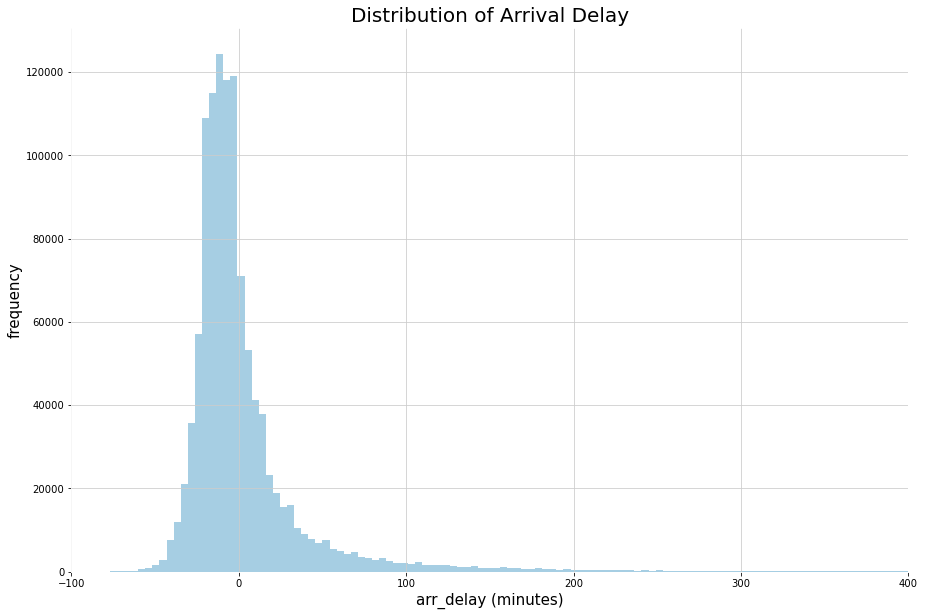

In [244]:
bins = 500

plt.figure(figsize = (15, 10))
plt.hist(data = flights, x = 'arr_delay', bins = bins)
plt.xlabel('arr_delay (minutes)')
plt.ylabel('frequency')
plt.title('Distribution of Arrival Delay')
plt.xlim(-100,400)
plt.show()

> What can be seen here is that the majority of flights do not have a delay, meaning a vlaue of zero. However, there seems to be a large number of flights with a delay of around 20 minutes and also quite some being early. Having a delay of more than 200 minutes should not be a regular case, thus, these are looked into further.

In [245]:
flights[flights.arr_delay > 200]

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_delay,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_arr_delay,delayed,early
37,2019,1,23,2,2019-01-23,9E,"Columbus, GA","Atlanta, GA",1803,262.0,...,29.0,83.0,0.0,76.0,6.0,0.0,186.0,NaN,True,False
45,2019,1,2,2,2019-01-02,9E,"Cincinnati, OH","Chicago, IL",930,218.0,...,54.0,264.0,152.0,0.0,0.0,0.0,51.0,NaN,True,False
49,2019,1,2,2,2019-01-02,9E,"Chicago, IL","Cincinnati, OH",1026,204.0,...,41.0,264.0,0.0,0.0,21.0,0.0,197.0,NaN,True,False
229,2019,1,18,4,2019-01-18,9E,"Atlanta, GA","Charlottesville, VA",2120,657.0,...,61.0,457.0,0.0,640.0,0.0,0.0,0.0,NaN,True,False
263,2019,1,19,5,2019-01-19,9E,"Charlottesville, VA","Atlanta, GA",600,250.0,...,78.0,457.0,0.0,0.0,0.0,0.0,241.0,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152462,2018,1,21,6,2018-01-21,AS,"Seattle, WA","Denver, CO",600,196.0,...,137.0,1024.0,0.0,0.0,217.0,0.0,0.0,NaN,True,False
1152506,2018,1,21,6,2018-01-21,AS,"Denver, CO","Seattle, WA",1045,203.0,...,152.0,1024.0,0.0,0.0,26.0,0.0,203.0,NaN,True,False
1153157,2018,1,23,1,2018-01-23,AS,"Juneau, AK","Sitka, AK",1029,483.0,...,21.0,95.0,483.0,0.0,9.0,0.0,0.0,NaN,True,False
1153181,2018,1,23,1,2018-01-23,AS,"Juneau, AK","Anchorage, AK",736,391.0,...,80.0,571.0,0.0,0.0,0.0,0.0,381.0,NaN,True,False


> At a first glimpse, an arrival delay of 640 minutes, for example, does sound extreme. However, since the departure delay is also high, these values are unlikely to be errors, but indeed, simply planes that left later, and therefore arrived later. Therefore, the relationship between arrival delay and departure dela yshould be investigated further. Additionally, the distances listed seem quite high, too.

In [246]:
flights[flights.arr_delay > 200].origin_city_name.value_counts()

Chicago, IL       765
New York, NY      594
Atlanta, GA       407
Boston, MA        403
Washington, DC    378
                 ... 
Hilo, HI            1
Ogdensburg, NY      1
Cody, WY            1
Cedar City, UT      1
Kearney, NE         1
Name: origin_city_name, Length: 309, dtype: int64

> Also, it seems like Chicago, New York and Atlanta lead the way with arrival delays.

In [247]:
flights[flights.dep_delay > 200].origin_city_name.value_counts()

Chicago, IL          761
New York, NY         624
Boston, MA           414
Atlanta, GA          403
Washington, DC       383
                    ... 
Wichita Falls, TX      1
Elko, NV               1
Barrow, AK             1
Yakutat, AK            1
Texarkana, AR          1
Name: origin_city_name, Length: 314, dtype: int64

> Interestingly, while Boston falls slightly behind for arrival delays, it overtakes Atlanta with departure delays.

## Distance

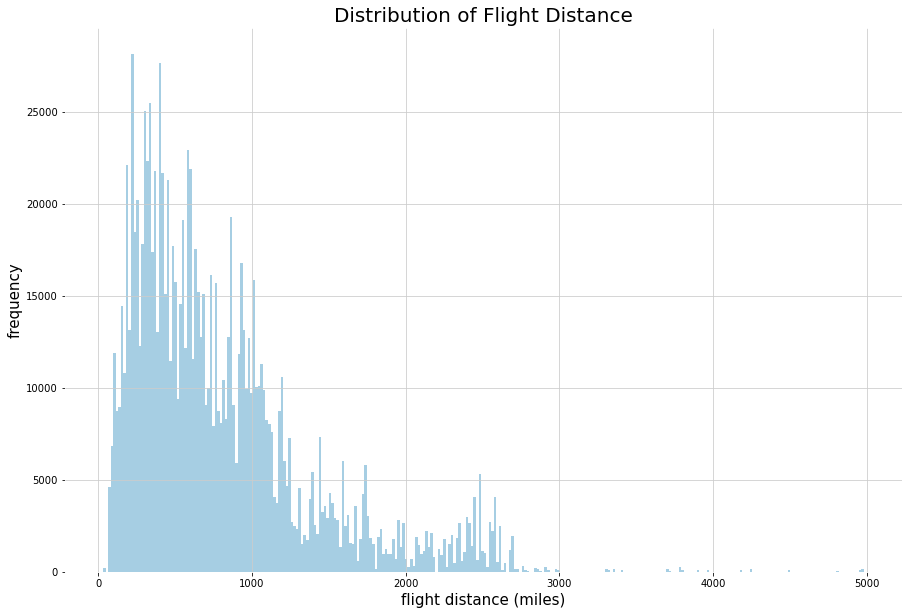

In [248]:
bins = 300

plt.figure(figsize = (15, 10))
plt.hist(data = flights, x = 'distance', bins = bins)
plt.xlabel('flight distance (miles)')
plt.ylabel('frequency')
plt.title('Distribution of Flight Distance')
#plt.xlim(-100,400)
plt.show()

> This distribution is also highly skewed, which is in line with the air time. If air time is high, travel distance most likely is, too (which could be investigated further in depth). However, the values above 3000 should be examined further in case they are outliers.

In [249]:
flights[flights.distance > 3000].origin_city_name.value_counts()

Honolulu, HI             647
Denver, CO               251
Dallas/Fort Worth, TX    225
Kahului, HI              188
Chicago, IL              110
Kona, HI                  73
New York, NY              70
Lihue, HI                 65
Atlanta, GA               62
Houston, TX               62
Newark, NJ                62
Guam, TT                  62
Minneapolis, MN           50
Washington, DC            19
Name: origin_city_name, dtype: int64

> It seems like a large number of the flights with high mileage are from Honululu, which does seem sensible.

> Still, the distribution has a very long tail, which is why it might make sense looking at it on a log scale.

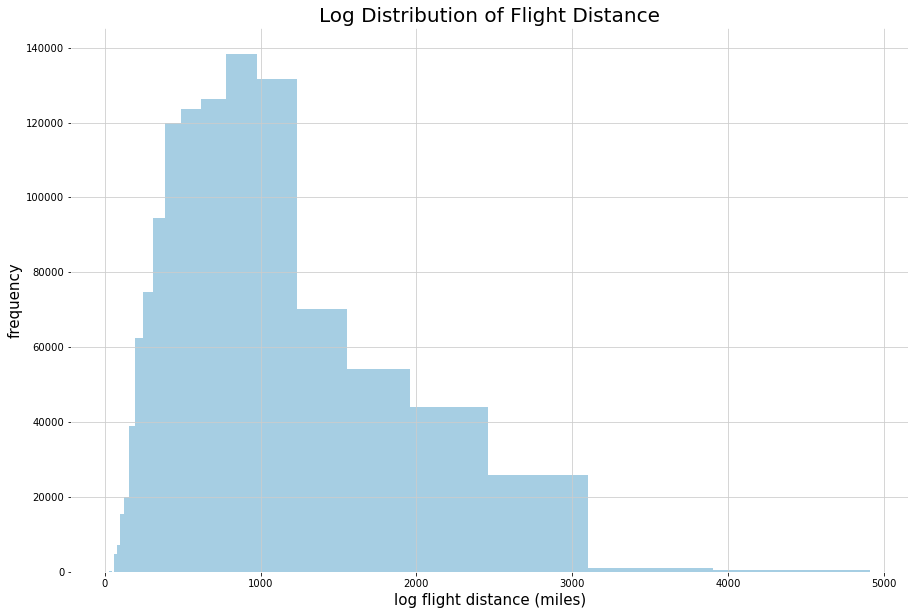

In [250]:
bins = 10 ** np.arange(np.log10(flights.distance.min()), np.log10(flights.distance.max()) + 0.01, 0.1)

plt.figure(figsize = (15, 10))
plt.hist(data = flights, x = 'distance', bins = bins)
plt.xlabel('log flight distance (miles)')
plt.ylabel('frequency')
plt.title('Log Distribution of Flight Distance')
#plt.xlim(-100,400)
plt.show()

> Even now, one cannot detect a normal distribution.

## Delayed Arrivals

In [251]:
delays = flights.delayed.value_counts().sort_index()

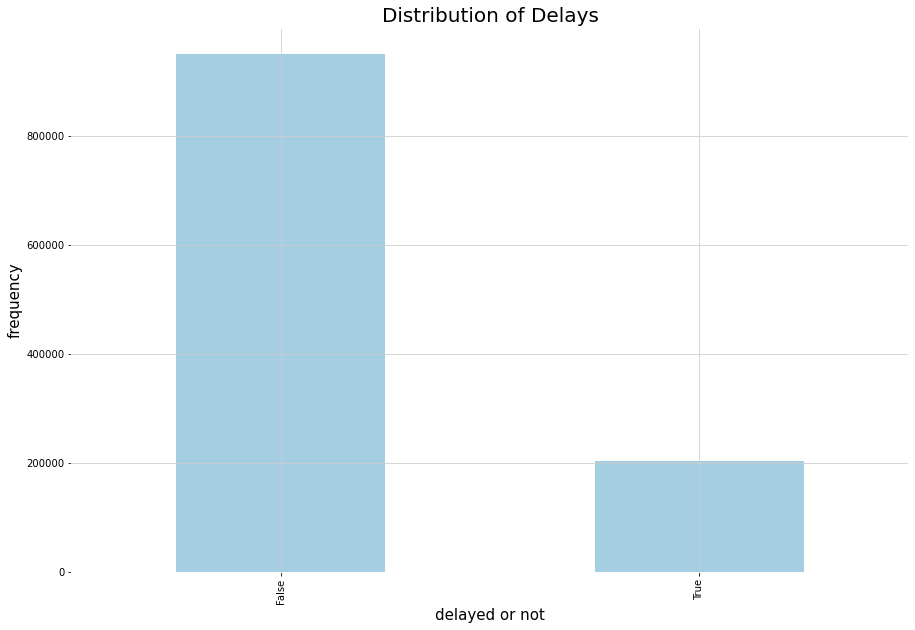

In [252]:
plt.figure(figsize = (15, 10))
plt.xlabel('delayed or not')
plt.ylabel('frequency')
plt.title('Distribution of Delays')
delays.plot.bar()

> There are more flights which are not delayed than they are delayed. However, the proportion of delays still seems to be around a quarter of the false ones, which is quite large.

In [253]:
flights.delayed.value_counts() / len(flights)

False    0.824121
True     0.175879
Name: delayed, dtype: float64

> As can be seen, around 18% are delayed, while 83% are not delayed.

## Early Arrivals

In [254]:
early = flights.early.value_counts().sort_index()

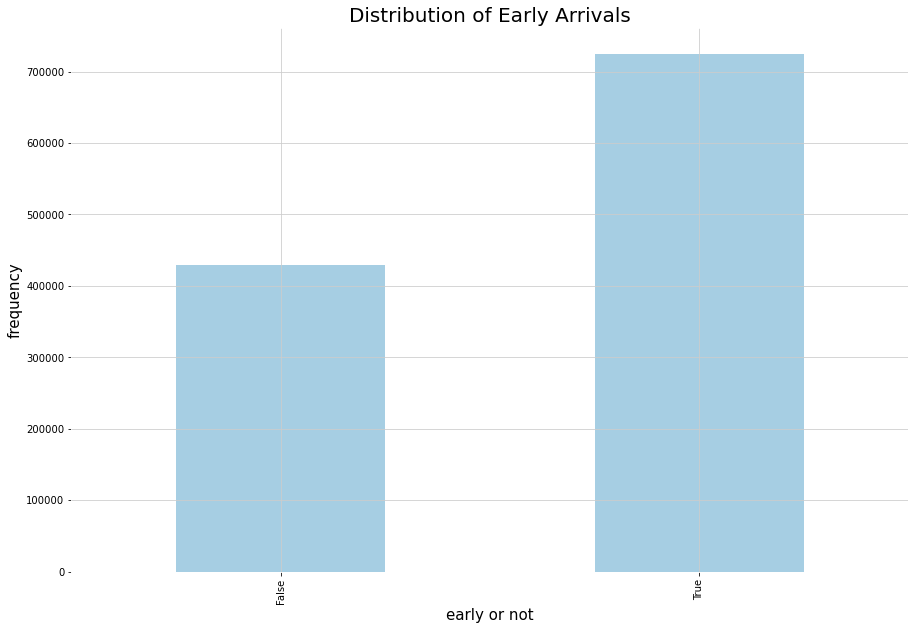

In [255]:
plt.figure(figsize = (15, 10))
plt.xlabel('early or not')
plt.ylabel('frequency')
plt.title('Distribution of Early Arrivals')
early.plot.bar()

> This plot shows that many of the arriving flights are actually early!

In [256]:
flights.early.value_counts() / len(flights)

True     0.62803
False    0.37197
Name: early, dtype: float64

> To be precise, 62% of flights are early, while 38% are not.

## Late Aircraft Delay

c:\users\annika\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\annika\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


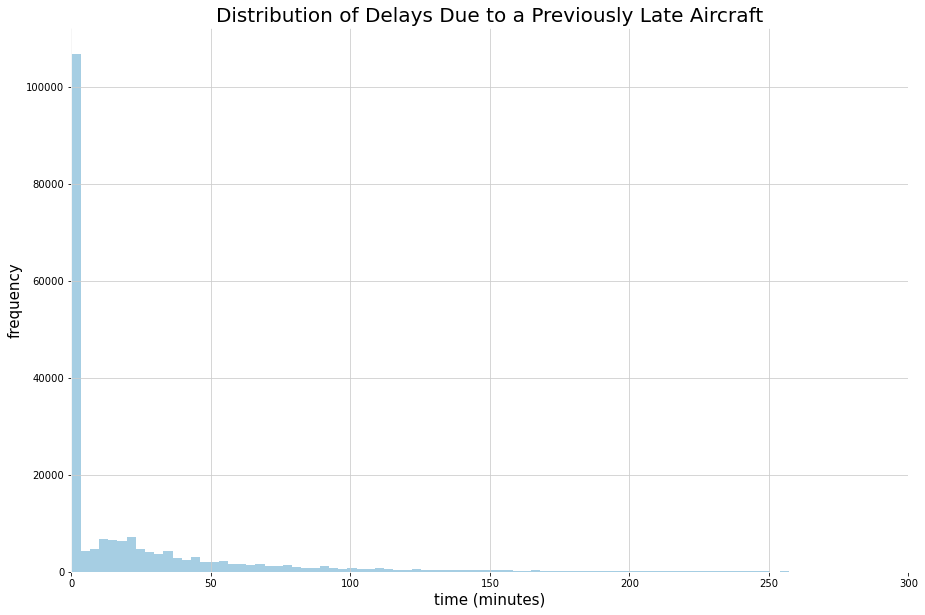

In [257]:
bins = 500

plt.figure(figsize = (15, 10))
plt.hist(data = flights, x = 'late_aircraft_delay', bins = bins)
plt.xlabel('time (minutes)')
plt.ylabel('frequency')
plt.title('Distribution of Delays Due to a Previously Late Aircraft')
plt.xlim(0, 300)
plt.show()

> While the majority of aircraft does not have this delay, there are quite a few who have a delay of up to 50 minutes.

## Carrier Delay

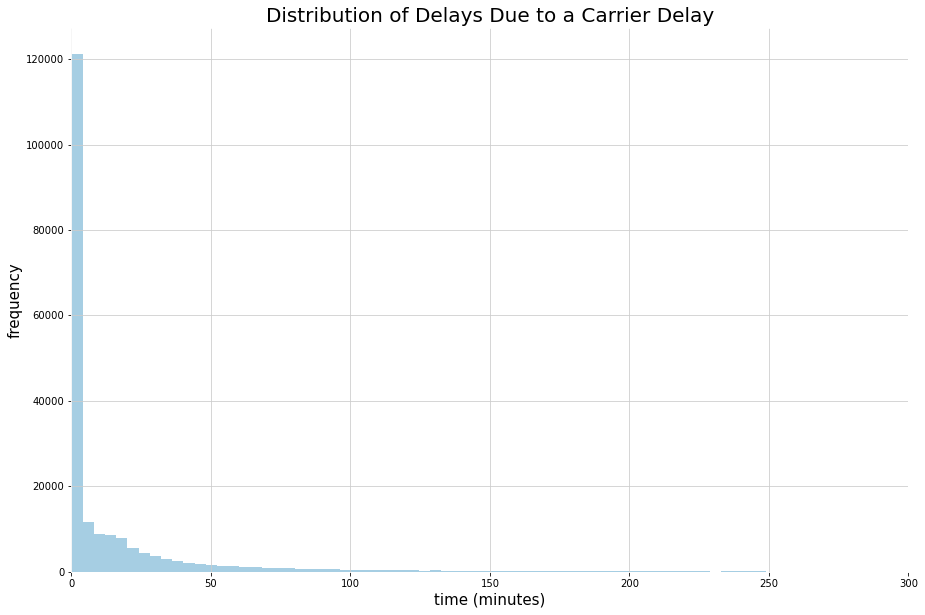

In [258]:
bins = 500

plt.figure(figsize = (15, 10))
plt.hist(data = flights, x = 'carrier_delay', bins = bins)
plt.xlabel('time (minutes)')
plt.ylabel('frequency')
plt.title('Distribution of Delays Due to a Carrier Delay')
plt.xlim(0, 300)
plt.show()

> While the majority of aircraft does not have this delay, there are quite a few who have a delay of up to 25 minutes.

## Weather Delay

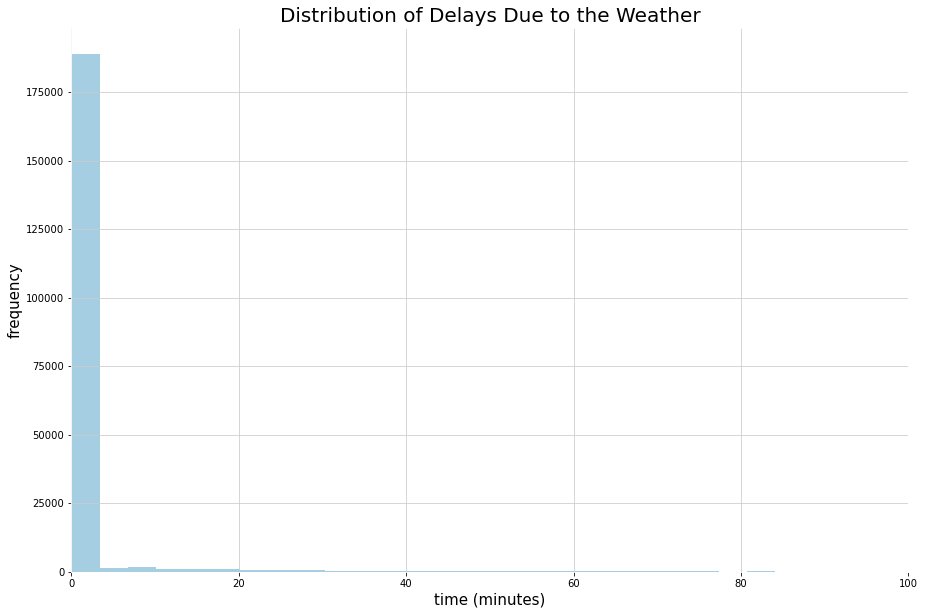

In [259]:
bins = 500

plt.figure(figsize = (15, 10))
plt.hist(data = flights, x = 'weather_delay', bins = bins)
plt.xlabel('time (minutes)')
plt.ylabel('frequency')
plt.title('Distribution of Delays Due to the Weather')
plt.xlim(0, 100)
plt.show()

> While the majority of aircraft does not have this delay, even the few delays are hardly significant.

## NAS Delay

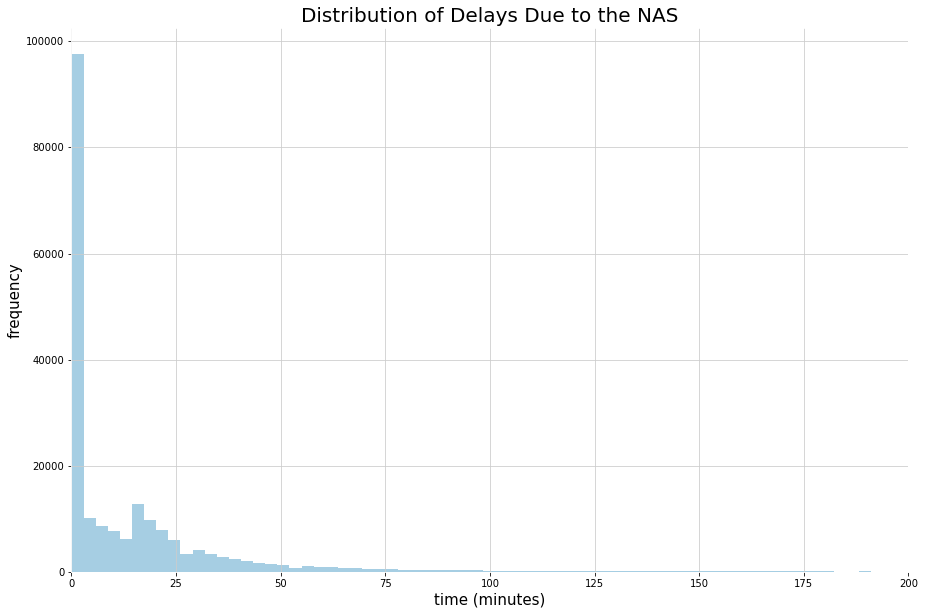

In [260]:
bins = 500

plt.figure(figsize = (15, 10))
plt.hist(data = flights, x = 'nas_delay', bins = bins)
plt.xlabel('time (minutes)')
plt.ylabel('frequency')
plt.title('Distribution of Delays Due to the NAS')
plt.xlim(0, 200)
plt.show()

> While the majority of aircraft does not have this delay, there are quite a few who have a delay of up to 25 minutes. Interestingly, the histogram first decreases and then peaks at around 15 minutes, after which it decreases again.

## Security Delay

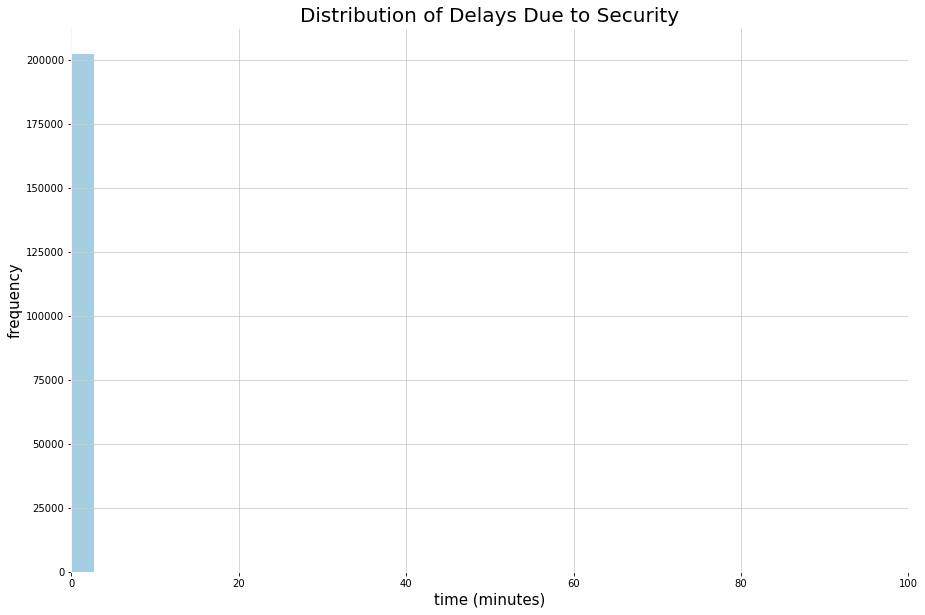

In [261]:
bins = 300

plt.figure(figsize = (15, 10))
plt.hist(data = flights, x = 'security_delay', bins = bins)
plt.xlabel('time (minutes)')
plt.ylabel('frequency')
plt.title('Distribution of Delays Due to Security')
plt.xlim(0, 100)
plt.show()

> In this dataset, none of the aircrafts have a delay due to security.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Many of the variables are right skewed. Especially when it comes to delays, it is not the norm for a plane to be extremely late - or at least most of them are on time, which leads to the skew. Despite sometimes trying out a log transformation, distributons were not normally distributed. While none of the delay causes appears very often, they do differ in terms of how often they appear.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> What did seem like an outlier at first was the flight distance. However, these flights turned out to simply be those to Hawaii, which seemed sensible.

## Bivariate Exploration

> Especially distance and airtime are expected to somewhat correlate with each other, since the further a plane needs to fly, the longer it will take. However, it makes sense to first take a look at the correlation plot to see how all variables interact

In [262]:
flights.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_delay,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_arr_delay,delayed,early
0,2019,1,6,6,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,2019,1,7,0,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,2019,1,8,1,2019-01-08,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,2019,1,9,2,2019-01-09,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,2019,1,10,3,2019-01-10,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True


## Correlation Plot

In [263]:
print(flights.columns.tolist())

['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'op_unique_carrier', 'origin_city_name', 'dest_city_name', 'crs_dep_time', 'dep_delay', 'crs_arr_time', 'arr_delay', 'cancelled', 'diverted', 'air_time', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'div_arr_delay', 'delayed', 'early']


In [264]:
numeric_vars = ['crs_dep_time', 'dep_delay', 'crs_arr_time', 'arr_delay', 'air_time', 'distance', 'carrier_delay','cancelled', 'diverted', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'div_arr_delay']
categoric_vars = ['year', 'month','day_of_month', 'day_of_week', 'fl_date', 'op_unique_carrier', 'origin_city_name', 'dest_city_name', 'cancelled', 'delayed', 'early']

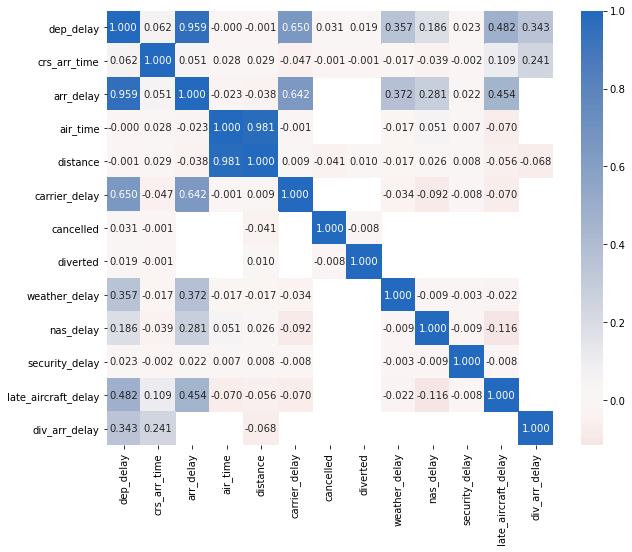

In [265]:
plt.figure(figsize = (10, 8))
sb.heatmap(flights[numeric_vars].corr(), annot = True, fmt = '.3f',
          cmap = 'vlag_r', center = 0)
plt.show()

> According to the correlation plot, the following relationships catch my eye are:<br>
1) Departure delay and arrival time<br>
2) Departure delay and arrival delay<br>
3) Departure delay and carrier delay<br>
4) Departure delay and weather delay<br>
5) Departure delay and late aircraft delay<br>
6) Arrival delay and carrier delay<br>
7) Air time and distance<br>

Text(0.5, 1.0, 'Delayed Flights per Days of the Week')

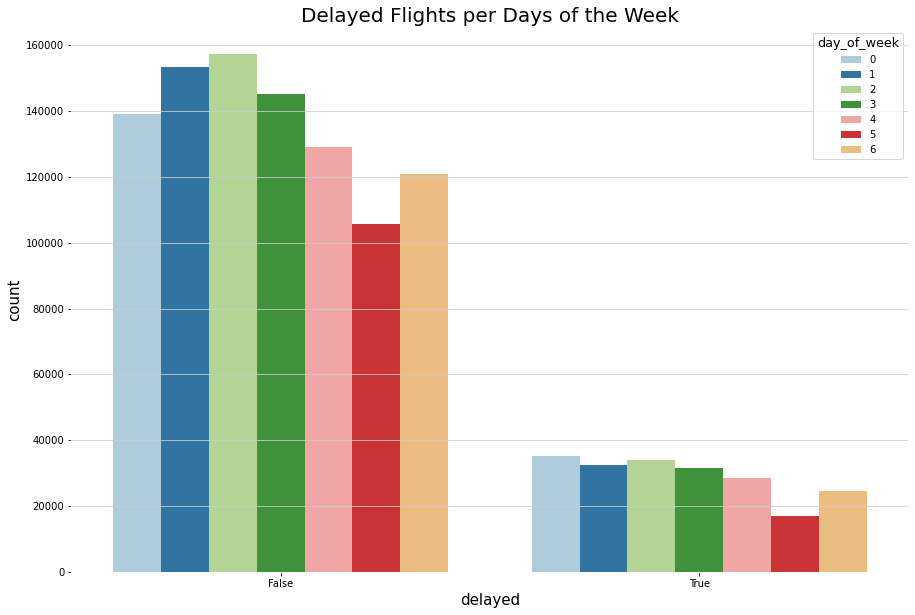

In [266]:
plt.figure(figsize=(15,10))
sb.countplot(data = flights, x = 'delayed', hue = 'day_of_week').set_title('Delayed Flights per Days of the Week')

> What one can see here is that Wednesday is the day on which flights the least delayed, whereas Monday is the day on which flights are the most delayed. Recall from earlier that Wednesday displayed the most flights, so it is rather surprising that this day does not have that many delays - and good!

Text(0.5, 1.0, 'Early Flights per Days of the Week')

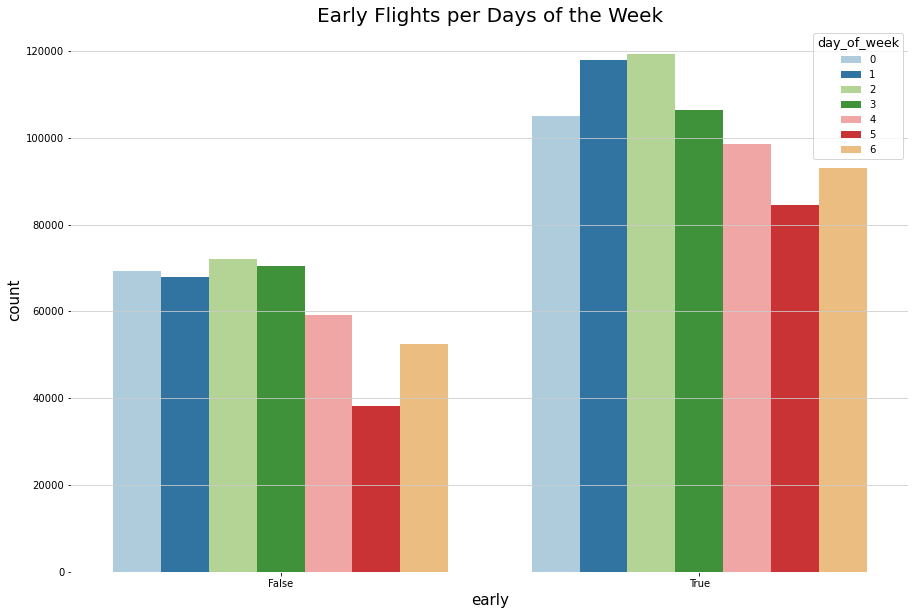

In [267]:
plt.figure(figsize=(15,10))
sb.countplot(data = flights, x = 'early', hue = 'day_of_week').set_title('Early Flights per Days of the Week')

Text(0.5, 1.0, 'Cancellations per Day of the Week')

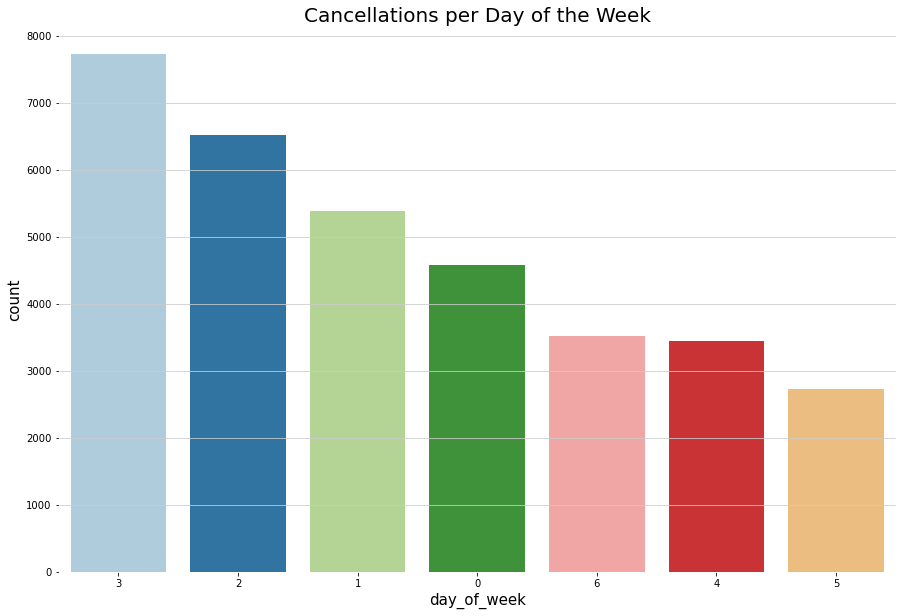

In [268]:
order = cancelled_flights.day_of_week.value_counts().index
plt.figure(figsize = (15,10))
sb.countplot(data = cancelled_flights, x = 'day_of_week', order = order)
plt.title('Cancellations per Day of the Week')


> The fact that Wednesday is the day with the highest cancellation frequency comes at quite a surprise, since it, nevertheless, is the day with most flights. However, this might be the reason for having to cancel certain flights.

## Distance and Air Time

Text(0.5, 1.0, 'Correlation between Distance and Air Time')

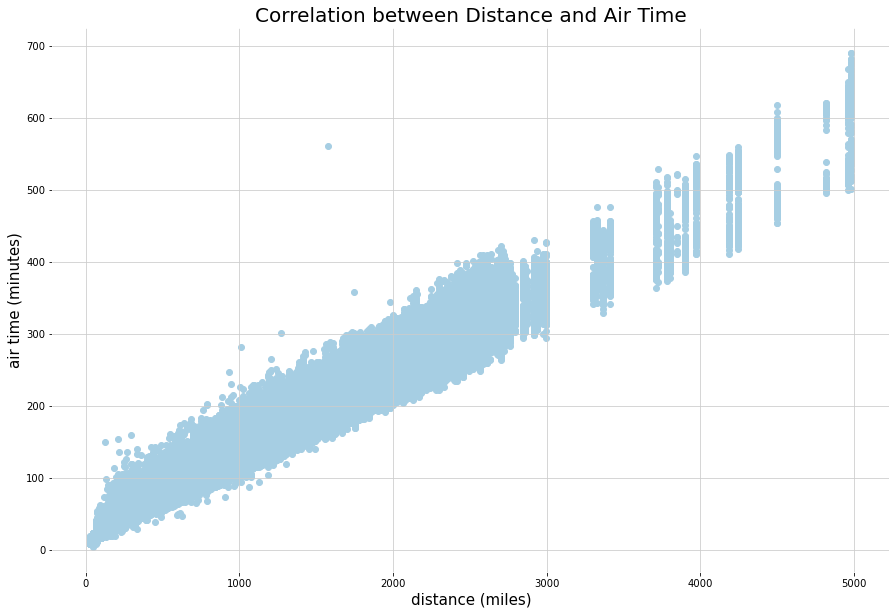

In [269]:
plt.scatter(data = flights, x = 'distance', y = 'air_time')
plt.xlabel('distance (miles)')
plt.ylabel('air time (minutes)')
plt.title('Correlation between Distance and Air Time')

> As expected (and seen in the correlation plot), with two noticeable outliers, these two variables are highly correlated and form a linear line. The two outliers of a distance around 1,800 and air time of 400 and 600, respectively, should be looked into.

In [270]:
flights[(flights.distance > 1500) & (flights.air_time > 400)]['origin_city_name'].value_counts()

Honolulu, HI             519
Denver, CO               231
Dallas/Fort Worth, TX    224
Chicago, IL              111
New York, NY              73
Kahului, HI               69
Atlanta, GA               62
Houston, TX               62
Newark, NJ                60
Minneapolis, MN           50
Phoenix, AZ               24
Boston, MA                22
Washington, DC            19
Guam, TT                  18
Salt Lake City, UT        10
Kona, HI                   8
Seattle, WA                8
Lihue, HI                  7
Fort Lauderdale, FL        5
Miami, FL                  4
Portland, OR               2
Bellingham, WA             2
Philadelphia, PA           2
Name: origin_city_name, dtype: int64

> Again, by far most of these flights are from Honululu. Even though one could see this as an outlier, I do consider this to belong to the nature of the flights and therefore will move on.

## Distance and Arrival Delay

Text(0.5, 1.0, 'Correlation between Arrival Delay and Distance')

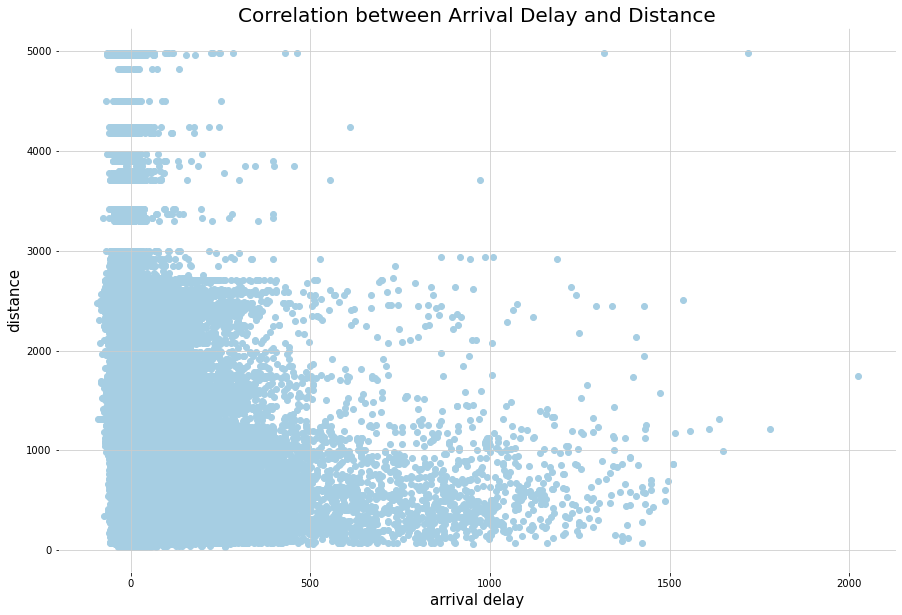

In [271]:
plt.scatter(data = flights, x = 'arr_delay', y = 'distance')
plt.xlabel('arrival delay')
plt.ylabel('distance')
plt.title('Correlation between Arrival Delay and Distance')

> Contrary to expectations, there does not seem to be a significant relationship between the distance of a plain and its arrival delay. The same is expected to hold for the departure delay.

Text(0.5, 1.0, 'Correlation between Departure Delay and Distance')

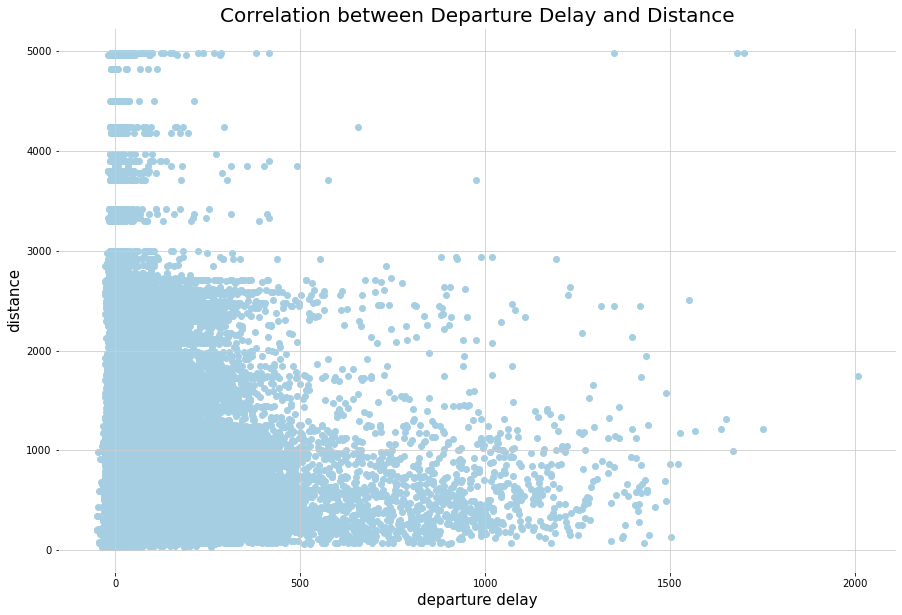

In [272]:
plt.scatter(data = flights, x = 'dep_delay', y = 'distance')
plt.xlabel('departure delay')
plt.ylabel('distance')
plt.title('Correlation between Departure Delay and Distance')

## Arrival and Departure Delay

Text(0.5, 1.0, 'Correlation between Arrival Delay and Departure Delay')

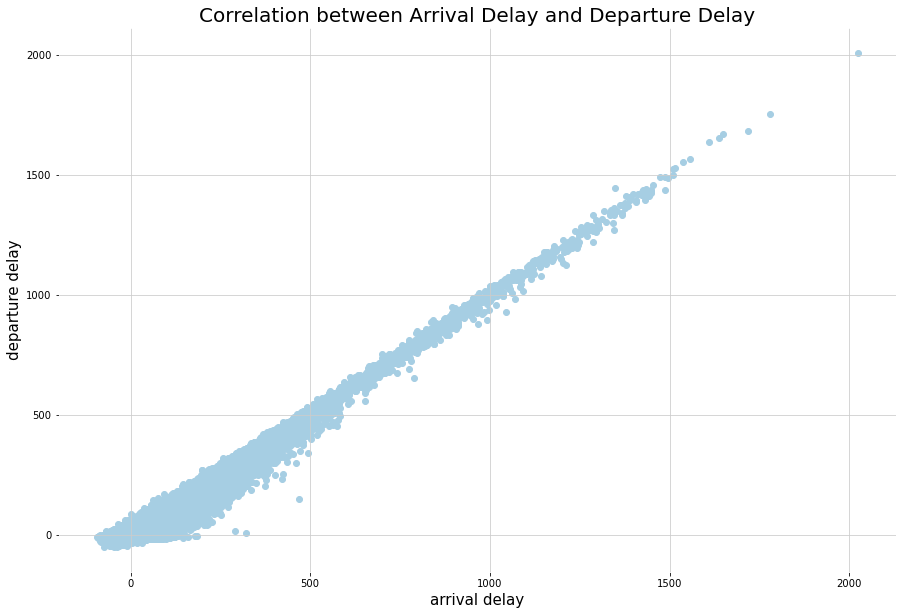

In [273]:
plt.scatter(data = flights, x = 'arr_delay', y = 'dep_delay')
plt.xlabel('arrival delay')
plt.ylabel('departure delay')
plt.title('Correlation between Arrival Delay and Departure Delay')

> As already indicated in the previous section, there is a proven correlation between the arrival and the departure delay. The later a plane arrives, the later it departs again.

## Arrival Delay and Delay Reasons

Text(0.5, 1.0, 'Correlation between Arrival Delay and Carrier Delay')

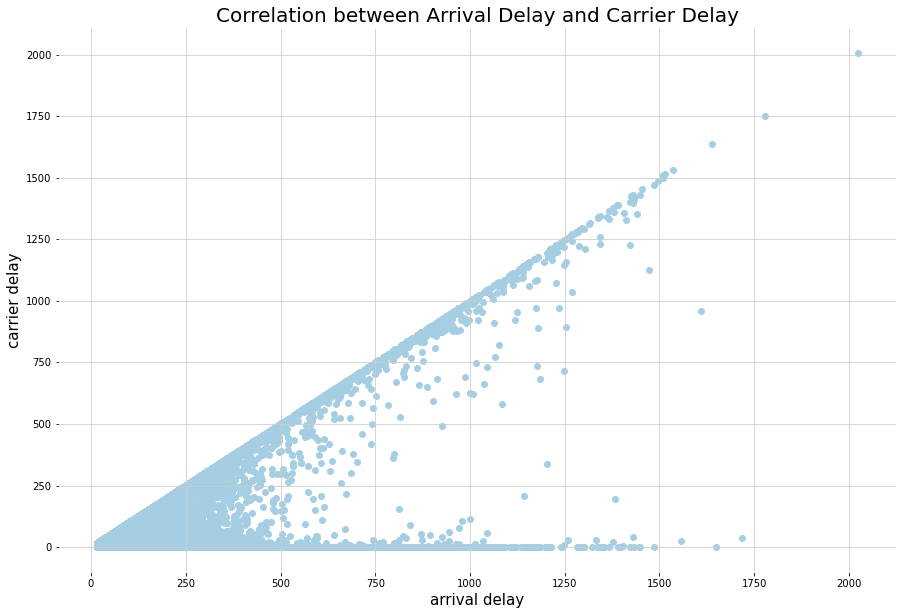

In [274]:
plt.scatter(data = flights, x = 'arr_delay', y = 'carrier_delay')
plt.xlabel('arrival delay')
plt.ylabel('carrier delay')
plt.title('Correlation between Arrival Delay and Carrier Delay')

> While there are many flights which don't have a carrier delay at all, for the ones that do, there is a strong correlation to the arrival delay. Is this the same for the departure?

Text(0.5, 1.0, 'Correlation between Departure Delay and Carrier Delay')

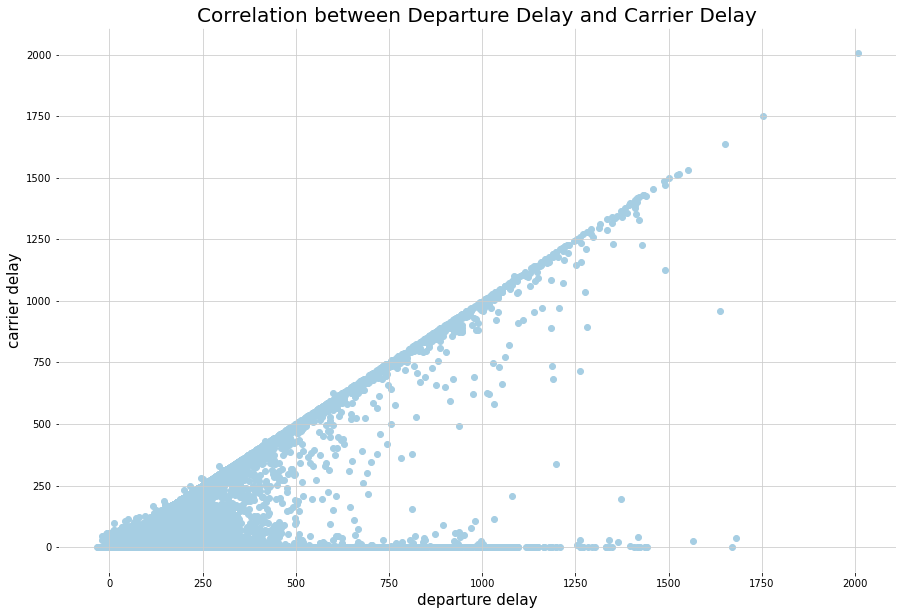

In [275]:
plt.scatter(data = flights, x = 'dep_delay', y = 'carrier_delay')
plt.xlabel('departure delay')
plt.ylabel('carrier delay')
plt.title('Correlation between Departure Delay and Carrier Delay')

> The same pattern shows.

> This pattern was also depicted for all the other delays. For tidiness reasons not all of these plots are included in this notebook!

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


> Distance and Arrival Delay surprisingly don't show any correlation. Expectations would have been that the further a plane needs to go, the higher the chance of it being delayed.

> However, arrival and departure delay again show a positive correlation, meaning that if a plane arrives late, it is also most likely going to depart late.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Distance and Air Time show a positive correlation to each other, meaning that with the distance of a plane, the flight time also increases, which is in line with expectations.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [276]:
flights.head(2)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_delay,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_arr_delay,delayed,early
0,2019,1,6,6,2019-01-06,9E,"Atlanta, GA","Columbus, GA",1645,-2.0,...,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,2019,1,7,0,2019-01-07,9E,"Atlanta, GA","Columbus, GA",1645,-5.0,...,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,False,True


## Delays over the Week

Text(0.5, 1.0, 'Delayed vs. Not Delayed Flights over the Week')

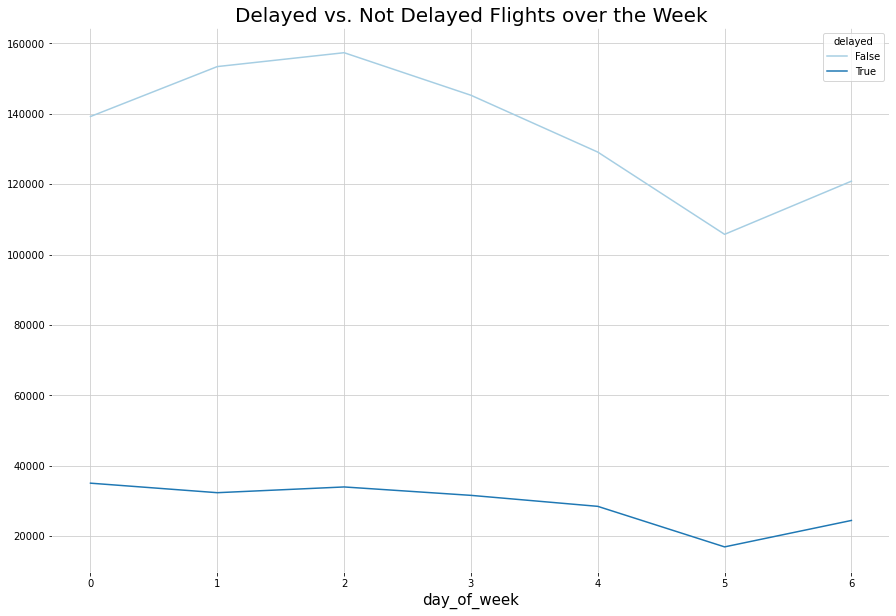

In [277]:
flights.groupby(['day_of_week'])['delayed'].value_counts().unstack().plot()

plt.title('Delayed vs. Not Delayed Flights over the Week')

> This graph shows the development of delayed versus not delayed flights over a week. What can be seen is that, luckily, the number of flights not being delayed is always higher than being delayed. Again we see the previous pattern: on Wednesdays there is a peak in flights not being delayed. On Saturdays there is both the least amount in delayed and not delayed flights

Text(0.5, 1.0, 'Early vs. Not Early Flights over the Years')

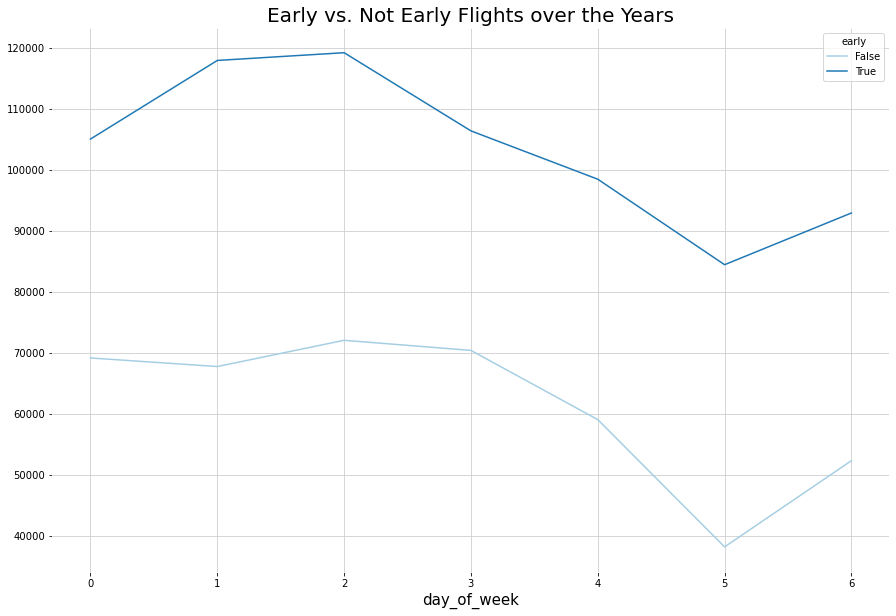

In [278]:
flights.groupby(['day_of_week'])['early'].value_counts().unstack().plot()

plt.title('Early vs. Not Early Flights over the Years')

> Looking at the early vs not early flights, it is interesting to see that there have always been more flights which were early than those which were not. Again, Saturday depicts the least - most likely since there are the least flights in general.

In [279]:
daily_delayed = flights.groupby(['day_of_week'])['delayed'].value_counts().unstack()

Text(0.5, 1.0, 'Delayed vs Not Delayed Flights over the Week')

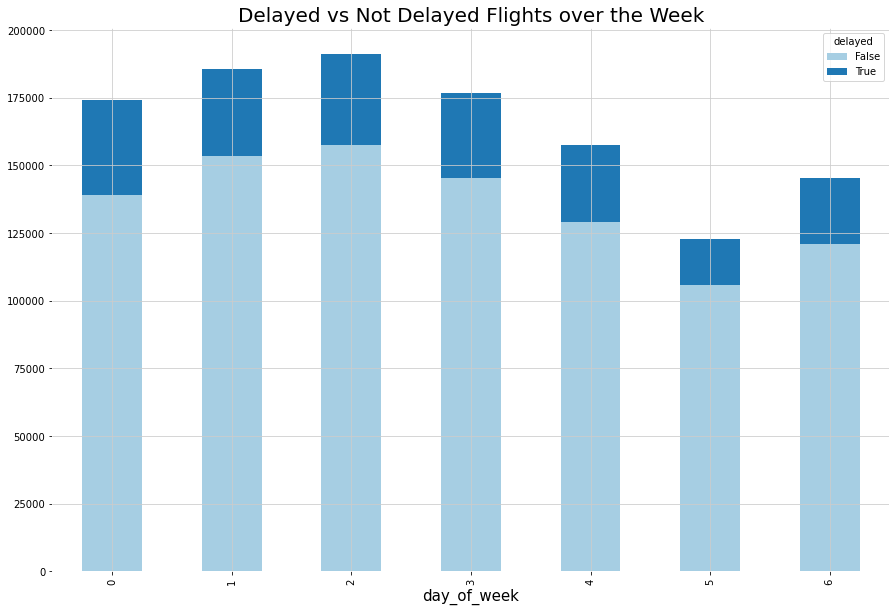

In [280]:
daily_delayed.plot.bar(stacked = True)
plt.title('Delayed vs Not Delayed Flights over the Week')

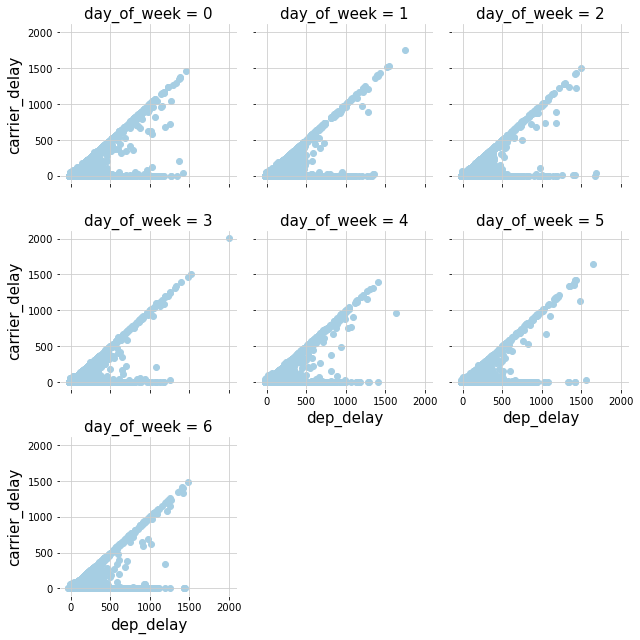

In [281]:
g = sb.FacetGrid(data = flights, col = 'day_of_week', col_wrap = 3, height = 3)
g.map(plt.scatter, 'dep_delay', 'carrier_delay')

> The correlation between arrival and departure delays does not seem to vary across days of the week

In [282]:
flights.origin_city_name.value_counts()

Chicago, IL              64931
Atlanta, GA              61772
New York, NY             47994
Dallas/Fort Worth, TX    45412
Houston, TX              38413
                         ...  
Pago Pago, TT               21
Owensboro, KY               20
Hagerstown, MD              19
Adak Island, AK             18
Youngstown/Warren, OH        2
Name: origin_city_name, Length: 342, dtype: int64

## Airline Differences

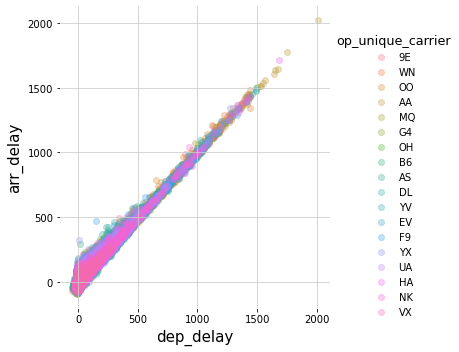

In [283]:
sb.lmplot(data = flights, x = 'dep_delay', y = 'arr_delay', hue = 'op_unique_carrier',
          fit_reg = False, scatter_kws = {'alpha': 0.3})

> The relationship for arrival and departure delay is also seen when looking at the unique carriers.

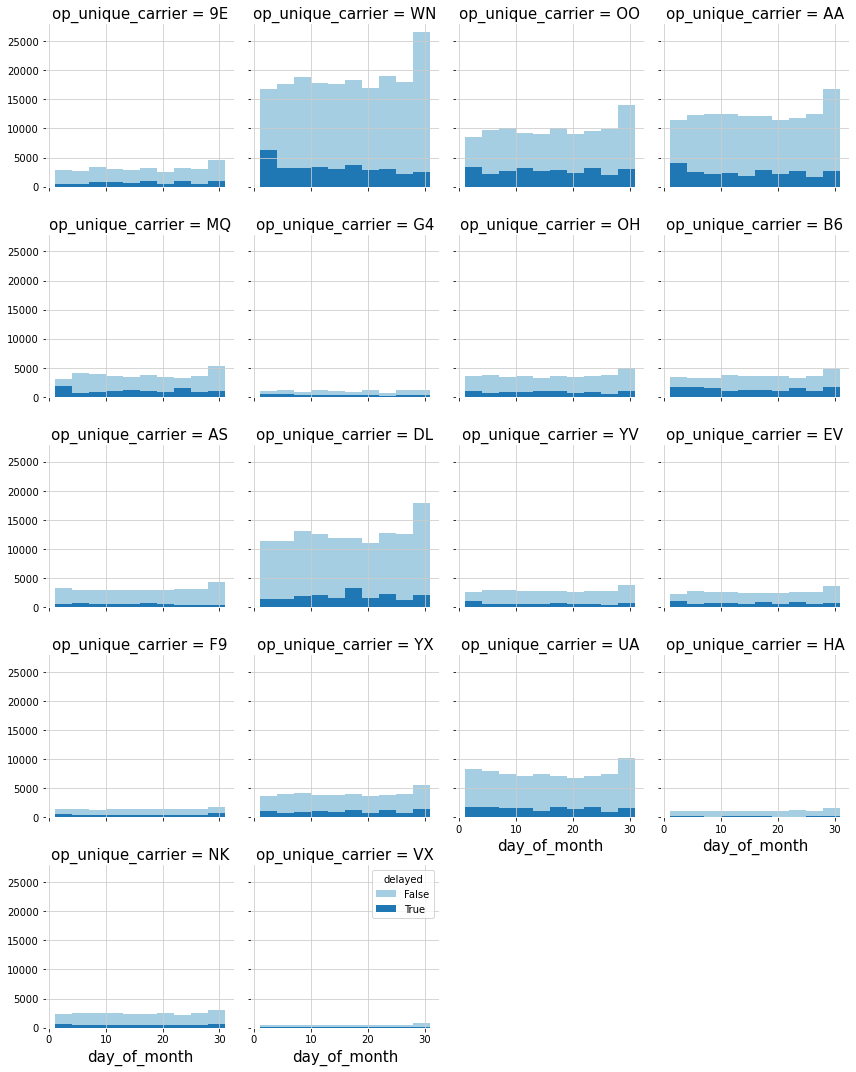

In [284]:
g = sb.FacetGrid(data = flights, col = 'op_unique_carrier', col_wrap = 4, hue = 'delayed')
g.map(plt.hist, 'day_of_month')
plt.legend(title = 'delayed')

> What can be seen here is how the delayed flights vary depending on the operator. Especially relatively seen, carrier DL seems to have a low proportion of delayed flights.

> As previously identified, though, the number of flights not delayed always exceeds those delayed.

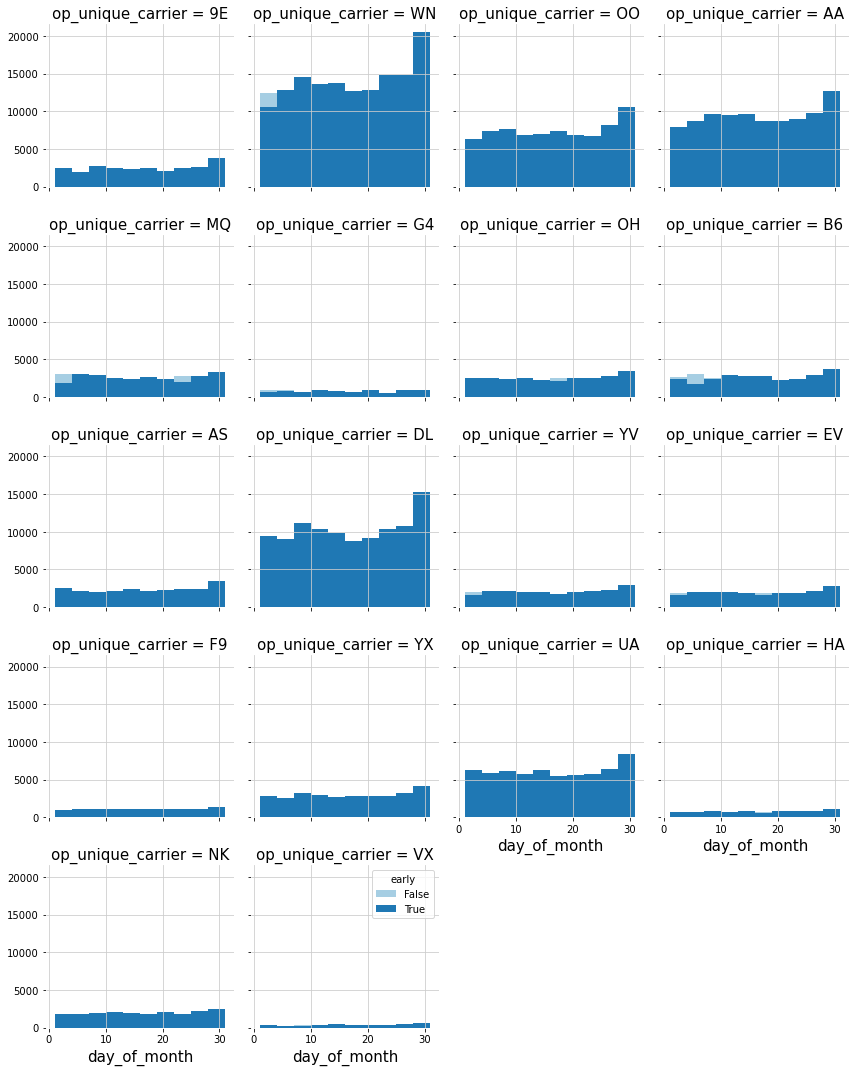

In [285]:
g = sb.FacetGrid(data = flights, col = 'op_unique_carrier', col_wrap = 4, hue = 'early')
g.map(plt.hist, 'day_of_month')
plt.legend(title = 'early')

> The facetted plot above highlights a few interesting points. While the dark blue histograms reflect flights arriving early, the light blue reflect flights not arriving early. It seems like the majority of operators, throughout January, always had flights arriving early. In fact, this sheds light onto operators WN, MQ, OH, B6 and YV who stand out by having flights that did not arrive early.

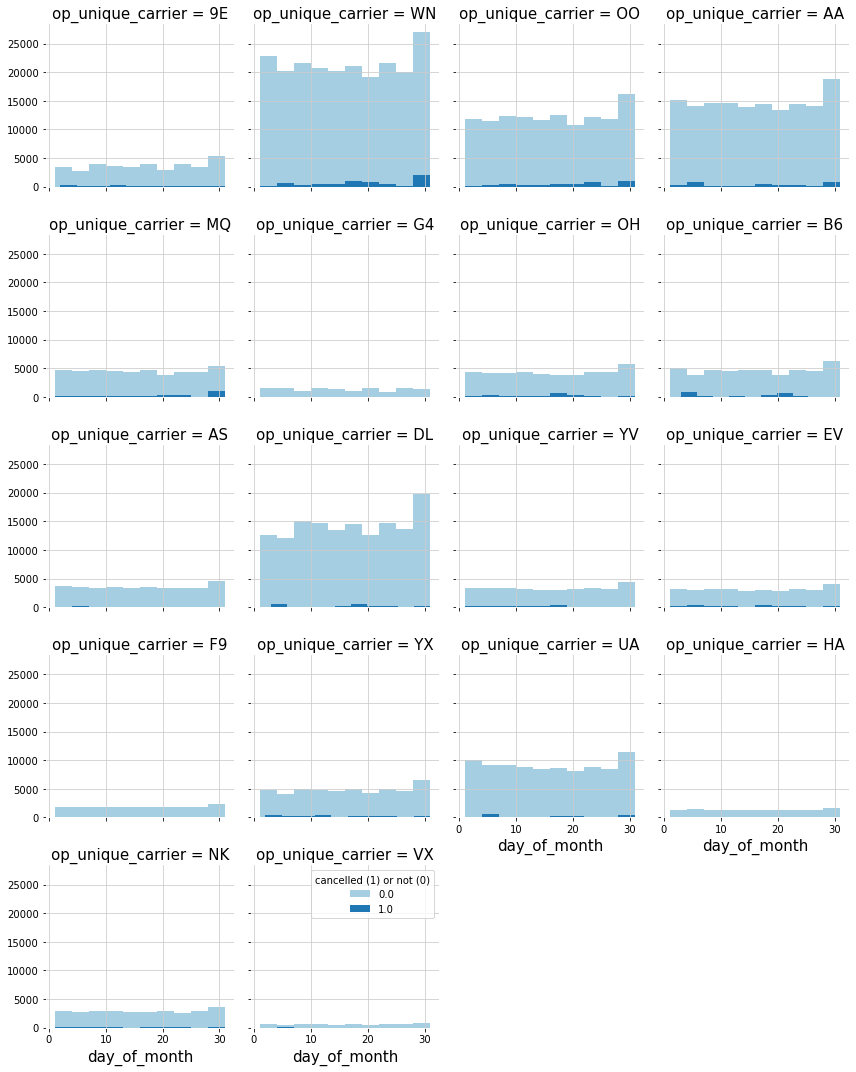

In [286]:
g = sb.FacetGrid(data = flights, col = 'op_unique_carrier', col_wrap = 4, hue = 'cancelled')
g.map(plt.hist, 'day_of_month')
plt.legend(title = 'cancelled (1) or not (0)')

> Luckily, there are not too many cancellations by any carrier. However, the ones that fly a lot, correspondingly do have many cancellations, although relatively seen, they do not appear too many here.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Towards the end, I focussed especially on differences between carriers. In general, it definitely depends on the carrier as to whether flights are delayed or not. I did expect to see more unexpected differences, but most of the time it boils down to the frequency of flights.

### Were there any interesting or surprising interactions between features?

> What I in the end found especially interesting was the difference between the carriers and how most of them are always early!